## Preparing the number of Entrepreneurs in 1800s

In [1]:
!pip install pysal


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\binso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as sms
import pysal as ps
import geopandas as gpd
from pysal.model.spreg import ML_Lag
import libpysal as lps

dat = pd.read_csv("LA_RSD_full_merged_data.csv")

print("Total unique RSDs:", dat['RSD1851'].nunique())
print("Total unique LAs:", dat['geo_code'].nunique())

Total unique RSDs: 1939
Total unique LAs: 345


In [3]:
dat

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
2,ABBEY HOLME,NaN,1851.0,653.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,NaN,NaN,NaN,NaN,NaN,NaN,12751.0,Anglesey,Anglesey,Holyhead,12751.0,8.472,W06000001,Isle of Anglesey,Ynys M??n,W92000004W06000001,Isle of Anglesey
13555,NaN,NaN,NaN,NaN,NaN,NaN,12752.0,Anglesey,Anglesey,Holyhead,12752.0,4.091,W06000001,Isle of Anglesey,Ynys M??n,W92000004W06000001,Isle of Anglesey
13556,NaN,NaN,NaN,NaN,NaN,NaN,12753.0,Anglesey,Anglesey,Holyhead,12753.0,7.282,W06000001,Isle of Anglesey,Ynys M??n,W92000004W06000001,Isle of Anglesey
13557,NaN,NaN,NaN,NaN,NaN,NaN,12754.0,Anglesey,Anglesey,Holyhead,12754.0,9.132,W06000001,Isle of Anglesey,Ynys M??n,W92000004W06000001,Isle of Anglesey


In [4]:
tmp = dat.groupby(['RSD1851'])['geo_code'].nunique()

rsds_multiple_las = tmp[tmp > 1]

In [5]:
len(rsds_multiple_las)

492

In [6]:
rsds_multiple_las

RSD1851
Aberford         2
Addingham        3
Albrighton       2
All Saints       4
Alresford        2
                ..
Yarm             3
Yealmpton        2
Yoxall           2
Ystradgynlais    2
Ystradvelltey    2
Name: geo_code, Length: 492, dtype: int64

In [7]:
dat[dat.RSD1851 == "Aberford"]

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name
13,ABERFORD,NaN,1851.0,422.0,9895.0,6.175,9895.0,"Yorkshire, West Riding",Tadcaster,Aberford,9895.0,6.175,E07000169,Selby,NaN,E92000001E07000169,Selby
14,ABERFORD,NaN,1851.0,422.0,9903.0,26.705,9903.0,"Yorkshire, West Riding",Tadcaster,Aberford,9903.0,26.705,E08000035,Leeds,NaN,E92000001E08000035,Leeds
15,ABERFORD,NaN,1851.0,422.0,9897.0,20.039,9897.0,"Yorkshire, West Riding",Tadcaster,Aberford,9897.0,20.039,E07000169,Selby,NaN,E92000001E07000169,Selby
11279,NaN,NaN,NaN,NaN,NaN,NaN,9894.0,"Yorkshire, West Riding",Tadcaster,Aberford,9894.0,8.099,E07000169,Selby,NaN,E92000001E07000169,Selby
11280,NaN,NaN,NaN,NaN,NaN,NaN,9896.0,"Yorkshire, West Riding",Tadcaster,Aberford,9896.0,4.745,E07000169,Selby,NaN,E92000001E07000169,Selby
11281,NaN,NaN,NaN,NaN,NaN,NaN,9898.0,"Yorkshire, West Riding",Tadcaster,Aberford,9898.0,4.509,E08000035,Leeds,NaN,E92000001E08000035,Leeds
11282,NaN,NaN,NaN,NaN,NaN,NaN,9899.0,"Yorkshire, West Riding",Tadcaster,Aberford,9899.0,11.196,E07000169,Selby,NaN,E92000001E07000169,Selby
11283,NaN,NaN,NaN,NaN,NaN,NaN,9900.0,"Yorkshire, West Riding",Tadcaster,Aberford,9900.0,6.575,E08000035,Leeds,NaN,E92000001E08000035,Leeds
11284,NaN,NaN,NaN,NaN,NaN,NaN,9901.0,"Yorkshire, West Riding",Tadcaster,Aberford,9901.0,3.616,E08000035,Leeds,NaN,E92000001E08000035,Leeds
11285,NaN,NaN,NaN,NaN,NaN,NaN,9902.0,"Yorkshire, West Riding",Tadcaster,Aberford,9902.0,7.293,E08000035,Leeds,NaN,E92000001E08000035,Leeds


In [8]:
dat = dat[dat['Total'].notna() & dat['Registration district'].notna()]

In [9]:
dat

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
2,ABBEY HOLME,NaN,1851.0,653.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,YSPYTTY,NaN,1851.0,210.0,12590.0,26.502,12590.0,Denbighshire,Llanwrst,Yspytty,12590.0,26.502,W06000003,Conwy,Conwy,W92000004W06000003,Conwy
3348,YSTRADGUNLAIS,NaN,1851.0,256.0,11918.0,90.220,11918.0,Glamorganshire,Neath,Ystradgynlais,11918.0,90.220,W06000023,Powys,Powys,W92000004W06000023,Powys
3349,YSTRADGUNLAIS,NaN,1851.0,256.0,11919.0,50.675,11919.0,Glamorganshire,Neath,Ystradgynlais,11919.0,50.675,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,W92000004W06000012,Neath Port Talbot
3350,YSTRADVZLLTEY,NaN,1851.0,86.0,11914.0,8.671,11914.0,Glamorganshire,Neath,Ystradvelltey,11914.0,8.671,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,W92000004W06000012,Neath Port Talbot


In [10]:
dat.groupby(['RSD1851'])['geo_code'].nunique() > 1

RSD1851
Abbey             False
Abbey Holme       False
Abbots Bromley    False
Abbots Langley    False
Abbotsbury        False
                  ...  
Yetminster        False
Yoxall            False
Yspytty           False
Ystradgynlais      True
Ystradvelltey      True
Name: geo_code, Length: 1885, dtype: bool

In [11]:
tmp = dat.groupby(['RSD1851'])['geo_code'].nunique()

rsds_multiple_las = tmp[tmp > 1]

In [12]:
len(rsds_multiple_las)

243

In [13]:
rsds_multiple_las = rsds_multiple_las.to_frame().reset_index(drop=False)

In [14]:
rsds_multiple_las

,RSD1851,geo_code
0,Aberford,2
1,Addingham,2
2,All Saints,4
3,Alston,3
4,Alton,3
...,...,...
238,Wyke,2
239,Yalding,2
240,Yarm,2
241,Ystradgynlais,2


In [15]:
rsds_multiple_las['geo_code']

0      2
1      2
2      4
3      3
4      3
      ..
238    2
239    2
240    2
241    2
242    2
Name: geo_code, Length: 243, dtype: int64

In [16]:
filtered_dat = dat[(dat['RSD1851'].isin(rsds_multiple_las['RSD1851']))]


In [17]:
filtered_dat

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name
13,ABERFORD,NaN,1851.0,422.0,9895.0,6.175,9895.0,"Yorkshire, West Riding",Tadcaster,Aberford,9895.0,6.175,E07000169,Selby,NaN,E92000001E07000169,Selby
14,ABERFORD,NaN,1851.0,422.0,9903.0,26.705,9903.0,"Yorkshire, West Riding",Tadcaster,Aberford,9903.0,26.705,E08000035,Leeds,NaN,E92000001E08000035,Leeds
15,ABERFORD,NaN,1851.0,422.0,9897.0,20.039,9897.0,"Yorkshire, West Riding",Tadcaster,Aberford,9897.0,20.039,E07000169,Selby,NaN,E92000001E07000169,Selby
28,ADDINGHAM,NaN,1851.0,350.0,9390.0,7.796,9390.0,"Yorkshire, West Riding",Skipton,Addingham,9390.0,7.796,E07000165,Harrogate,NaN,E92000001E07000165,Harrogate
29,ADDINGHAM,NaN,1851.0,350.0,9392.0,8.398,9392.0,"Yorkshire, West Riding",Skipton,Addingham,9392.0,8.398,E07000163,Craven,NaN,E92000001E07000163,Craven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,YARM,NaN,1851.0,0.0,10718.0,6.111,10718.0,Durham,Stockton,Yarm,10718.0,6.111,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees
3348,YSTRADGUNLAIS,NaN,1851.0,256.0,11918.0,90.220,11918.0,Glamorganshire,Neath,Ystradgynlais,11918.0,90.220,W06000023,Powys,Powys,W92000004W06000023,Powys
3349,YSTRADGUNLAIS,NaN,1851.0,256.0,11919.0,50.675,11919.0,Glamorganshire,Neath,Ystradgynlais,11919.0,50.675,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,W92000004W06000012,Neath Port Talbot
3350,YSTRADVZLLTEY,NaN,1851.0,86.0,11914.0,8.671,11914.0,Glamorganshire,Neath,Ystradvelltey,11914.0,8.671,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,W92000004W06000012,Neath Port Talbot


In [18]:
most_frequent_geo = filtered_dat.groupby('Registration district')['geo_code'].agg(lambda x: x.value_counts().idxmax())

# Merge back the most frequent 'geo_code' with the original DataFrame
merged_df = pd.merge(filtered_dat, most_frequent_geo, on='Registration district', suffixes=('', '_most_frequent'))

# Filter rows to keep only the rows where 'geo_code' matches the most frequent one for each "Registration district"
filtered_df = merged_df[merged_df['geo_code'] == merged_df['geo_code_most_frequent']]

In [19]:
filtered_df

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name,geo_code_most_frequent
0,ABERFORD,NaN,1851.0,422.0,9895.0,6.175,9895.0,"Yorkshire, West Riding",Tadcaster,Aberford,9895.0,6.175,E07000169,Selby,NaN,E92000001E07000169,Selby,E07000169
2,ABERFORD,NaN,1851.0,422.0,9897.0,20.039,9897.0,"Yorkshire, West Riding",Tadcaster,Aberford,9897.0,20.039,E07000169,Selby,NaN,E92000001E07000169,Selby,E07000169
3,ADDINGHAM,NaN,1851.0,350.0,9390.0,7.796,9390.0,"Yorkshire, West Riding",Skipton,Addingham,9390.0,7.796,E07000165,Harrogate,NaN,E92000001E07000165,Harrogate,E07000165
5,ALBURY,NaN,1851.0,237.0,213.0,26.940,213.0,Surrey,Guildford,Ripley,213.0,26.940,E07000209,Guildford,NaN,E92000001E07000209,Guildford,E07000209
6,RIPLEY,NaN,1851.0,155.0,213.0,26.940,213.0,Surrey,Guildford,Ripley,213.0,26.940,E07000209,Guildford,NaN,E92000001E07000209,Guildford,E07000209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,YARM,NaN,1851.0,0.0,10730.0,4.524,10730.0,Durham,Stockton,Yarm,10730.0,4.524,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004
747,YARM,NaN,1851.0,0.0,10725.0,8.749,10725.0,Durham,Stockton,Yarm,10725.0,8.749,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004
748,YARM,NaN,1851.0,0.0,10722.0,13.586,10722.0,Durham,Stockton,Yarm,10722.0,13.586,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004
749,YARM,NaN,1851.0,0.0,10718.0,6.111,10718.0,Durham,Stockton,Yarm,10718.0,6.111,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004


In [20]:
filtered_df = filtered_df.drop_duplicates(subset=['geo_code', 'Registration district'])

In [21]:
filtered_df

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name,geo_code_most_frequent
0,ABERFORD,NaN,1851.0,422.0,9895.0,6.175,9895.0,"Yorkshire, West Riding",Tadcaster,Aberford,9895.0,6.175,E07000169,Selby,NaN,E92000001E07000169,Selby,E07000169
3,ADDINGHAM,NaN,1851.0,350.0,9390.0,7.796,9390.0,"Yorkshire, West Riding",Skipton,Addingham,9390.0,7.796,E07000165,Harrogate,NaN,E92000001E07000165,Harrogate,E07000165
5,ALBURY,NaN,1851.0,237.0,213.0,26.940,213.0,Surrey,Guildford,Ripley,213.0,26.940,E07000209,Guildford,NaN,E92000001E07000209,Guildford,E07000209
6,RIPLEY,NaN,1851.0,155.0,213.0,26.940,213.0,Surrey,Guildford,Ripley,213.0,26.940,E07000209,Guildford,NaN,E92000001E07000209,Guildford,E07000209
13,ALL SAINTS,NORTHAMPTON,1851.0,1180.0,2145.0,7.972,2145.0,Northamptonshire,Northampton,All Saints,2145.0,7.972,E07000154,Northampton,NaN,E92000001E07000154,Northampton,E07000154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,WORTLEY,LEEDS,1851.0,955.0,9620.0,4.037,9620.0,"Yorkshire, West Riding",Hunslet,Wortley,9620.0,4.037,E08000035,Leeds,NaN,E92000001E08000035,Leeds,E08000035
737,WRENBURY,NaN,1851.0,699.0,8724.0,17.297,8724.0,Cheshire,Nantwich,Wrenbury,8724.0,17.297,E06000049,Cheshire East,NaN,E92000001E06000049,Cheshire East,E06000049
742,WYKE,NaN,1851.0,156.0,893.0,4.063,893.0,Sussex,Westhampnett,Wyke,893.0,4.063,E07000225,Chichester,NaN,E92000001E07000225,Chichester,E07000225
746,YARM,NaN,1851.0,0.0,10730.0,4.524,10730.0,Durham,Stockton,Yarm,10730.0,4.524,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004


In [22]:
filtered_df.groupby(['geo_code'])['Registration district'].nunique()

geo_code
E06000002    1
E06000004    1
E06000008    1
E06000010    1
E06000011    5
            ..
W06000018    2
W06000020    1
W06000021    2
W06000022    1
W06000023    8
Name: Registration district, Length: 185, dtype: int64

In [23]:
dat

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
2,ABBEY HOLME,NaN,1851.0,653.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,YSPYTTY,NaN,1851.0,210.0,12590.0,26.502,12590.0,Denbighshire,Llanwrst,Yspytty,12590.0,26.502,W06000003,Conwy,Conwy,W92000004W06000003,Conwy
3348,YSTRADGUNLAIS,NaN,1851.0,256.0,11918.0,90.220,11918.0,Glamorganshire,Neath,Ystradgynlais,11918.0,90.220,W06000023,Powys,Powys,W92000004W06000023,Powys
3349,YSTRADGUNLAIS,NaN,1851.0,256.0,11919.0,50.675,11919.0,Glamorganshire,Neath,Ystradgynlais,11919.0,50.675,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,W92000004W06000012,Neath Port Talbot
3350,YSTRADVZLLTEY,NaN,1851.0,86.0,11914.0,8.671,11914.0,Glamorganshire,Neath,Ystradvelltey,11914.0,8.671,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,W92000004W06000012,Neath Port Talbot


In [24]:
final_merged = pd.concat([dat[~dat['RSD1851'].isin(rsds_multiple_las['RSD1851'])], filtered_df])

In [25]:
final_merged

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name,geo_code_most_frequent
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset,NaN
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
2,ABBEY HOLME,NaN,1851.0,653.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,WORTLEY,LEEDS,1851.0,955.0,9620.0,4.037,9620.0,"Yorkshire, West Riding",Hunslet,Wortley,9620.0,4.037,E08000035,Leeds,NaN,E92000001E08000035,Leeds,E08000035
737,WRENBURY,NaN,1851.0,699.0,8724.0,17.297,8724.0,Cheshire,Nantwich,Wrenbury,8724.0,17.297,E06000049,Cheshire East,NaN,E92000001E06000049,Cheshire East,E06000049
742,WYKE,NaN,1851.0,156.0,893.0,4.063,893.0,Sussex,Westhampnett,Wyke,893.0,4.063,E07000225,Chichester,NaN,E92000001E07000225,Chichester,E07000225
746,YARM,NaN,1851.0,0.0,10730.0,4.524,10730.0,Durham,Stockton,Yarm,10730.0,4.524,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004


In [26]:
final_merged_tmp = final_merged.drop_duplicates(subset=['geo_code', 'Registration district'])

In [27]:
final_merged_tmp

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name,geo_code_most_frequent
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset,NaN
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire,NaN
6,ABBOTS LANGLEY,NaN,1851.0,159.0,1638.0,21.287,1638.0,Hertfordshire,Watford,Abbots Langley,1638.0,21.287,E07000102,Three Rivers,NaN,E92000001E07000102,Three Rivers,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,WORTHING,NaN,1851.0,639.0,862.0,10.117,862.0,Sussex,Worthing,Broadwater,862.0,10.117,E07000223,Adur,NaN,E92000001E07000223,Adur,E07000223
735,WORTLEY,LEEDS,1851.0,955.0,9620.0,4.037,9620.0,"Yorkshire, West Riding",Hunslet,Wortley,9620.0,4.037,E08000035,Leeds,NaN,E92000001E08000035,Leeds,E08000035
742,WYKE,NaN,1851.0,156.0,893.0,4.063,893.0,Sussex,Westhampnett,Wyke,893.0,4.063,E07000225,Chichester,NaN,E92000001E07000225,Chichester,E07000225
746,YARM,NaN,1851.0,0.0,10730.0,4.524,10730.0,Durham,Stockton,Yarm,10730.0,4.524,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004


In [28]:
tmp2 = final_merged_tmp.groupby(['geo_code'])['RSD1851'].nunique()

LA_with_multiple_RSDs = tmp2[tmp2 > 1]

In [29]:
LA_with_multiple_RSDs

geo_code
E06000003     4
E06000004     2
E06000005     2
E06000006     2
E06000007     5
             ..
W06000020     2
W06000021    10
W06000022     2
W06000023    34
W06000024     2
Name: RSD1851, Length: 286, dtype: int64

In [30]:
final_merged_tmp = final_merged_tmp.drop_duplicates(subset=['geo_code', 'Registration district'])
final_wo_duplicates = final_merged_tmp.groupby('geo_code')['Total'].sum()

In [31]:
final_merged_tmp

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name,geo_code_most_frequent
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset,NaN
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire,NaN
6,ABBOTS LANGLEY,NaN,1851.0,159.0,1638.0,21.287,1638.0,Hertfordshire,Watford,Abbots Langley,1638.0,21.287,E07000102,Three Rivers,NaN,E92000001E07000102,Three Rivers,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,WORTHING,NaN,1851.0,639.0,862.0,10.117,862.0,Sussex,Worthing,Broadwater,862.0,10.117,E07000223,Adur,NaN,E92000001E07000223,Adur,E07000223
735,WORTLEY,LEEDS,1851.0,955.0,9620.0,4.037,9620.0,"Yorkshire, West Riding",Hunslet,Wortley,9620.0,4.037,E08000035,Leeds,NaN,E92000001E08000035,Leeds,E08000035
742,WYKE,NaN,1851.0,156.0,893.0,4.063,893.0,Sussex,Westhampnett,Wyke,893.0,4.063,E07000225,Chichester,NaN,E92000001E07000225,Chichester,E07000225
746,YARM,NaN,1851.0,0.0,10730.0,4.524,10730.0,Durham,Stockton,Yarm,10730.0,4.524,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004


final_wo_duplicates = 1851 number of entrepreneurs

In [32]:
final_wo_duplicates

geo_code
E06000001     1121.0
E06000002      732.0
E06000003     1075.0
E06000004      942.0
E06000005     1349.0
              ...   
W06000020     1107.0
W06000021     4386.0
W06000022     1047.0
W06000023    13068.0
W06000024     1855.0
Name: Total, Length: 330, dtype: float64

In [33]:
type(final_wo_duplicates)

pandas.core.series.Series

In [34]:
active_business = pd.read_csv("2022_activebuisness.csv")


In [35]:
active_business

,Area code,Area name,Time period,Value (number of enterprises)
0,E06000001,Hartlepool,2022,2430
1,E06000002,Middlesbrough,2022,4040
2,E06000003,Redcar and Cleveland,2022,3420
3,E06000004,Stockton-on-Tees,2022,6170
4,E06000005,Darlington,2022,3700
...,...,...,...,...
369,W06000020,Torfaen,2022,2455
370,W06000021,Monmouthshire,2022,4240
371,W06000022,Newport,2022,4885
372,W06000023,Powys,2022,5795


In [36]:
joined_df = pd.merge(active_business, final_wo_duplicates, left_on = "Area code", right_on = 'geo_code')


In [37]:
joined_df

,Area code,Area name,Time period,Value (number of enterprises),Total
0,E06000001,Hartlepool,2022,2430,1121.0
1,E06000002,Middlesbrough,2022,4040,732.0
2,E06000003,Redcar and Cleveland,2022,3420,1075.0
3,E06000004,Stockton-on-Tees,2022,6170,942.0
4,E06000005,Darlington,2022,3700,1349.0
...,...,...,...,...,...
295,W06000020,Torfaen,2022,2455,1107.0
296,W06000021,Monmouthshire,2022,4240,4386.0
297,W06000022,Newport,2022,4885,1047.0
298,W06000023,Powys,2022,5795,13068.0


In [38]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\binso\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
productivity = pd.read_csv("2022_productivity.csv")
productivity

,Area code,Area name,Time period,Value (Productivity)
0,E06000001,Hartlepool,2021,29.84
1,E06000002,Middlesbrough,2021,29.50
2,E06000003,Redcar and Cleveland,2021,28.42
3,E06000004,Stockton-on-Tees,2021,39.76
4,E06000005,Darlington,2021,28.56
...,...,...,...,...
369,W06000020,Torfaen,2021,29.74
370,W06000021,Monmouthshire,2021,34.72
371,W06000022,Newport,2021,32.33
372,W06000023,Powys,2021,24.02


In [40]:
productivity[productivity['Value (Productivity)'].isna()]

,Area code,Area name,Time period,Value (Productivity)


In [41]:
joined_df = pd.merge(productivity[["Area code","Value (Productivity)"]], joined_df, on = "Area code")
joined_df

,Area code,Value (Productivity),Area name,Time period,Value (number of enterprises),Total
0,E06000001,29.84,Hartlepool,2022,2430,1121.0
1,E06000002,29.50,Middlesbrough,2022,4040,732.0
2,E06000003,28.42,Redcar and Cleveland,2022,3420,1075.0
3,E06000004,39.76,Stockton-on-Tees,2022,6170,942.0
4,E06000005,28.56,Darlington,2022,3700,1349.0
...,...,...,...,...,...,...
295,W06000020,29.74,Torfaen,2022,2455,1107.0
296,W06000021,34.72,Monmouthshire,2022,4240,4386.0
297,W06000022,32.33,Newport,2022,4885,1047.0
298,W06000023,24.02,Powys,2022,5795,13068.0


In [42]:
median_weekly_pay = pd.read_csv("2022_median_weekly_pay.csv")
median_weekly_pay

,Area code,Area name,2017,2018,2019,2020,2021,2022
0,E06000001,Hartlepool,2660.0,2570.0,2535.0,2480.0,2485.0,2430.0
1,E06000002,Middlesbrough,3625.0,3690.0,3865.0,3940.0,4035.0,4040.0
2,E06000003,Redcar and Cleveland,3400.0,3415.0,3425.0,3335.0,3345.0,3420.0
3,E06000004,Stockton-on-Tees,6145.0,6075.0,6085.0,6070.0,6210.0,6170.0
4,E06000005,Darlington,3420.0,3715.0,3525.0,3410.0,3665.0,3700.0
...,...,...,...,...,...,...,...,...
396,W06000020,Torfaen,2265.0,2295.0,2370.0,2370.0,2415.0,2455.0
397,W06000021,Monmouthshire,4120.0,4105.0,4155.0,4110.0,4225.0,4240.0
398,W06000022,Newport,5485.0,5620.0,5650.0,5325.0,5200.0,4885.0
399,W06000023,Powys,5780.0,5685.0,5695.0,5665.0,5785.0,5795.0


In [43]:
joined_df = pd.merge(median_weekly_pay[["Area code","2022"]], joined_df, on = "Area code")
joined_df

,Area code,2022,Value (Productivity),Area name,Time period,Value (number of enterprises),Total
0,E06000001,2430.0,29.84,Hartlepool,2022,2430,1121.0
1,E06000002,4040.0,29.50,Middlesbrough,2022,4040,732.0
2,E06000003,3420.0,28.42,Redcar and Cleveland,2022,3420,1075.0
3,E06000004,6170.0,39.76,Stockton-on-Tees,2022,6170,942.0
4,E06000005,3700.0,28.56,Darlington,2022,3700,1349.0
...,...,...,...,...,...,...,...
295,W06000020,2455.0,29.74,Torfaen,2022,2455,1107.0
296,W06000021,4240.0,34.72,Monmouthshire,2022,4240,4386.0
297,W06000022,4885.0,32.33,Newport,2022,4885,1047.0
298,W06000023,5795.0,24.02,Powys,2022,5795,13068.0


In [44]:
joined_df = joined_df.rename(columns={'Total':'EntrepreneurCount1851','Area code': 'geo_code','2022': 'MedianWeeklyPay2022', 'Value (Productivity)':'Productivity2021', 'Value (number of enterprises)':'EnterpriseCount2022'})

In [45]:
joined_df

,geo_code,MedianWeeklyPay2022,Productivity2021,Area name,Time period,EnterpriseCount2022,EntrepreneurCount1851
0,E06000001,2430.0,29.84,Hartlepool,2022,2430,1121.0
1,E06000002,4040.0,29.50,Middlesbrough,2022,4040,732.0
2,E06000003,3420.0,28.42,Redcar and Cleveland,2022,3420,1075.0
3,E06000004,6170.0,39.76,Stockton-on-Tees,2022,6170,942.0
4,E06000005,3700.0,28.56,Darlington,2022,3700,1349.0
...,...,...,...,...,...,...,...
295,W06000020,2455.0,29.74,Torfaen,2022,2455,1107.0
296,W06000021,4240.0,34.72,Monmouthshire,2022,4240,4386.0
297,W06000022,4885.0,32.33,Newport,2022,4885,1047.0
298,W06000023,5795.0,24.02,Powys,2022,5795,13068.0


## Local Authorities to Exclude

In [46]:
dist_train = pd.read_csv("distance_to_closest_trainstation_from_centroids_of_LAs.csv")
dist_port = pd.read_csv("distance_to_closest_port_from_centroids_of_LAs.csv")
count_train = pd.read_csv("counts_of_trainstations_in_LAs.csv")
count_port = pd.read_csv("counts_of_ports_in_LAs.csv")
intersection_area_between_las_and_majorcitiest = pd.read_csv("intersection_majorcities_and_localauthorities.csv")

In [47]:
# density of railway?
# excluding geo_code of scotland and north ireland >> geo_code starts with E and W is the england and wales
# excluding geo_code of major cities

In [48]:
intersection_area_between_las_and_majorcitiest

,OBJECTID,TCITY15CD,TCITY15NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geo_code,geo_label,geo_labelw,label,name,overlap_area
0,1,J01000001,Barnsley,436375,407875,-1.452250,53.56625,2.568247e+07,115099.860000,E08000036,Wakefield,NaN,E92000001E08000036,Wakefield,1.145539e+04
1,1,J01000001,Barnsley,436375,407875,-1.452250,53.56625,2.568247e+07,115099.860000,E08000016,Barnsley,NaN,E92000001E08000016,Barnsley,2.569075e+07
2,2,J01000002,Basildon,572525,189350,0.488409,51.57661,2.551499e+07,119299.838000,E07000066,Basildon,NaN,E92000001E07000066,Basildon,2.551704e+07
3,3,J01000003,Basingstoke,463725,152600,-1.087930,51.26899,2.918502e+07,93900.388003,E07000084,Basingstoke and Deane,NaN,E92000001E07000084,Basingstoke and Deane,2.920545e+07
4,4,J01000004,Bath,374800,164325,-2.363450,51.37741,2.423750e+07,92099.940000,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset,2.425646e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,110,J01000110,Worcester,386575,255800,-2.197840,52.20027,2.423248e+07,89800.048000,E07000235,Malvern Hills,NaN,E92000001E07000235,Malvern Hills,5.240824e+05
332,111,J01000111,Worthing,512825,104825,-0.399230,50.83196,2.458249e+07,47000.022000,E07000229,Worthing,NaN,E92000001E07000229,Worthing,2.233542e+07
333,111,J01000111,Worthing,512825,104825,-0.399230,50.83196,2.458249e+07,47000.022000,E07000224,Arun,NaN,E92000001E07000224,Arun,2.252104e+06
334,111,J01000111,Worthing,512825,104825,-0.399230,50.83196,2.458249e+07,47000.022000,E07000223,Adur,NaN,E92000001E07000223,Adur,6.890613e+03


In [49]:
majorcity_area = intersection_area_between_las_and_majorcitiest.groupby(['TCITY15CD'])['overlap_area'].sum()

In [50]:
majorcity_area

TCITY15CD
J01000001    2.570221e+07
J01000002    2.551704e+07
J01000003    2.920545e+07
J01000004    2.425646e+07
J01000005    2.017804e+07
                 ...     
J01000108    2.910593e+07
J01000109    5.937223e+07
J01000110    2.425169e+07
J01000111    2.459442e+07
J01000112    3.372142e+07
Name: overlap_area, Length: 112, dtype: float64

In [51]:
tmp = pd.merge(intersection_area_between_las_and_majorcitiest, majorcity_area, on='TCITY15CD', suffixes=('', '_sum'))

tmp['LA_ratio'] = tmp['overlap_area']/tmp['overlap_area_sum']

tmp

,OBJECTID,TCITY15CD,TCITY15NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geo_code,geo_label,geo_labelw,label,name,overlap_area,overlap_area_sum,LA_ratio
0,1,J01000001,Barnsley,436375,407875,-1.452250,53.56625,2.568247e+07,115099.860000,E08000036,Wakefield,NaN,E92000001E08000036,Wakefield,1.145539e+04,2.570221e+07,0.000446
1,1,J01000001,Barnsley,436375,407875,-1.452250,53.56625,2.568247e+07,115099.860000,E08000016,Barnsley,NaN,E92000001E08000016,Barnsley,2.569075e+07,2.570221e+07,0.999554
2,2,J01000002,Basildon,572525,189350,0.488409,51.57661,2.551499e+07,119299.838000,E07000066,Basildon,NaN,E92000001E07000066,Basildon,2.551704e+07,2.551704e+07,1.000000
3,3,J01000003,Basingstoke,463725,152600,-1.087930,51.26899,2.918502e+07,93900.388003,E07000084,Basingstoke and Deane,NaN,E92000001E07000084,Basingstoke and Deane,2.920545e+07,2.920545e+07,1.000000
4,4,J01000004,Bath,374800,164325,-2.363450,51.37741,2.423750e+07,92099.940000,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset,2.425646e+07,2.425646e+07,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,110,J01000110,Worcester,386575,255800,-2.197840,52.20027,2.423248e+07,89800.048000,E07000235,Malvern Hills,NaN,E92000001E07000235,Malvern Hills,5.240824e+05,2.425169e+07,0.021610
332,111,J01000111,Worthing,512825,104825,-0.399230,50.83196,2.458249e+07,47000.022000,E07000229,Worthing,NaN,E92000001E07000229,Worthing,2.233542e+07,2.459442e+07,0.908150
333,111,J01000111,Worthing,512825,104825,-0.399230,50.83196,2.458249e+07,47000.022000,E07000224,Arun,NaN,E92000001E07000224,Arun,2.252104e+06,2.459442e+07,0.091570
334,111,J01000111,Worthing,512825,104825,-0.399230,50.83196,2.458249e+07,47000.022000,E07000223,Adur,NaN,E92000001E07000223,Adur,6.890613e+03,2.459442e+07,0.000280


In [52]:
# tmp_series[tmp_series < 0.7].index

In [53]:
# In case of london, LAs are generally smaller than the "major cities coverage"
tmp[tmp['TCITY15CD'] == 'J01000055']

,OBJECTID,TCITY15CD,TCITY15NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geo_code,geo_label,geo_labelw,label,name,overlap_area,overlap_area_sum,LA_ratio
134,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000023,Lewisham,NaN,E92000001E09000023,Lewisham,3.519203e+07,1.243202e+09,0.028308
135,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000028,Southwark,NaN,E92000001E09000028,Southwark,2.898309e+07,1.243202e+09,0.023313
136,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000025,Newham,NaN,E92000001E09000025,Newham,3.130332e+07,1.243202e+09,0.025180
137,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000024,Merton,NaN,E92000001E09000024,Merton,3.762468e+07,1.243202e+09,0.030264
138,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000029,Sutton,NaN,E92000001E09000029,Sutton,3.910343e+07,1.243202e+09,0.031454
139,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000019,Islington,NaN,E92000001E09000019,Islington,1.486547e+07,1.243202e+09,0.011957
140,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E07000072,Epping Forest,NaN,E92000001E07000072,Epping Forest,1.924229e+05,1.243202e+09,0.000155
141,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000011,Greenwich,NaN,E92000001E09000011,Greenwich,4.584324e+07,1.243202e+09,0.036875
142,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E09000006,Bromley,NaN,E92000001E09000006,Bromley,8.660481e+07,1.243202e+09,0.069663
143,55,J01000055,London,518300,178550,-0.2973,51.49352,1.242733e+09,1.184300e+06,E07000208,Epsom and Ewell,NaN,E92000001E07000208,Epsom and Ewell,9.404253e+04,1.243202e+09,0.000076


In [54]:
# Norwich - 64%, Broadland - 31%
tmp[tmp['TCITY15CD'] == 'J01000066']

,OBJECTID,TCITY15CD,TCITY15NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geo_code,geo_label,geo_labelw,label,name,overlap_area,overlap_area_sum,LA_ratio
214,66,J01000066,Norwich,622500,310000,1.287271,52.64211,5.262256e+07,106399.916004,E07000148,Norwich,NaN,E92000001E07000148,Norwich,3.369301e+07,5.260055e+07,0.640545
215,66,J01000066,Norwich,622500,310000,1.287271,52.64211,5.262256e+07,106399.916004,E07000149,South Norfolk,NaN,E92000001E07000149,South Norfolk,2.459421e+06,5.260055e+07,0.046757
216,66,J01000066,Norwich,622500,310000,1.287271,52.64211,5.262256e+07,106399.916004,E07000144,Broadland,NaN,E92000001E07000144,Broadland,1.644811e+07,5.260055e+07,0.312699


In [55]:
# Reading - 56%, Wokingham - 31%
tmp[tmp['TCITY15CD'] == 'J01000076']

,OBJECTID,TCITY15CD,TCITY15NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geo_code,geo_label,geo_labelw,label,name,overlap_area,overlap_area_sum,LA_ratio
245,76,J01000076,Reading,471775,172450,-0.96856,51.4465,5.813996e+07,131700.1304,E06000038,Reading,NaN,E92000001E06000038,Reading,3.296782e+07,5.817901e+07,0.566662
246,76,J01000076,Reading,471775,172450,-0.96856,51.4465,5.813996e+07,131700.1304,E07000179,South Oxfordshire,NaN,E92000001E07000179,South Oxfordshire,1.316745e+05,5.817901e+07,0.002263
247,76,J01000076,Reading,471775,172450,-0.96856,51.4465,5.813996e+07,131700.1304,E06000037,West Berkshire,NaN,E92000001E06000037,West Berkshire,6.858278e+06,5.817901e+07,0.117882
248,76,J01000076,Reading,471775,172450,-0.96856,51.4465,5.813996e+07,131700.1304,E06000041,Wokingham,NaN,E92000001E06000041,Wokingham,1.822124e+07,5.817901e+07,0.313193


In [56]:
# Watford - 62%, Three rivers - 32%
tmp[tmp['TCITY15CD'] == 'J01000104']

,OBJECTID,TCITY15CD,TCITY15NM,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geo_code,geo_label,geo_labelw,label,name,overlap_area,overlap_area_sum,LA_ratio
312,104,J01000104,Watford,510700,198150,-0.40056,51.67123,2.869748e+07,84899.968801,E07000103,Watford,NaN,E92000001E07000103,Watford,1.789658e+07,2.871172e+07,0.623320
313,104,J01000104,Watford,510700,198150,-0.40056,51.67123,2.869748e+07,84899.968801,E07000102,Three Rivers,NaN,E92000001E07000102,Three Rivers,9.106078e+06,2.871172e+07,0.317155
314,104,J01000104,Watford,510700,198150,-0.40056,51.67123,2.869748e+07,84899.968801,E07000098,Hertsmere,NaN,E92000001E07000098,Hertsmere,2.539867e+05,2.871172e+07,0.008846
315,104,J01000104,Watford,510700,198150,-0.40056,51.67123,2.869748e+07,84899.968801,E09000015,Harrow,NaN,E92000001E09000015,Harrow,4.793653e+03,2.871172e+07,0.000167
316,104,J01000104,Watford,510700,198150,-0.40056,51.67123,2.869748e+07,84899.968801,E07000100,St Albans,NaN,E92000001E07000100,St Albans,1.450283e+06,2.871172e+07,0.050512


In [57]:
LAs_including_large_proportion_of_major_cities = tmp[tmp['LA_ratio']>0.3]['geo_code']

In [58]:
LAs_including_large_proportion_of_major_cities

1      E08000016
2      E07000066
3      E07000084
4      E06000022
5      E06000055
         ...    
322    E07000217
327    E08000031
329    E07000237
332    E07000229
335    E06000014
Name: geo_code, Length: 114, dtype: object

In [59]:
LAs_area_size = pd.read_csv("LAs_area_size.csv")

In [60]:
tmp2 = pd.merge(intersection_area_between_las_and_majorcitiest, LAs_area_size, on="geo_code")

In [61]:
(tmp2['overlap_area'] / tmp2['Area'] > 0.3).sum()

78

In [62]:
LAs_comprised_of_major_cities_over_30_percent = tmp2[tmp2['overlap_area'] / tmp2['Area'] > 0.3]['geo_code']

In [63]:
LAs_comprised_of_major_cities_over_30_percent

30     E08000025
41     E06000009
49     E06000029
50     E06000028
67     E06000043
         ...    
315    E07000101
324    E07000103
329    E08000031
330    E07000237
332    E07000229
Name: geo_code, Length: 78, dtype: object

In [64]:
scotland_and_north_ireland_geo_codes = LAs_area_size[~(LAs_area_size.geo_code.str.startswith("E") | LAs_area_size.geo_code.str.startswith("W"))]['geo_code']

In [65]:
len(scotland_and_north_ireland_geo_codes)

58

In [66]:
LAs_to_exclude = pd.concat([LAs_including_large_proportion_of_major_cities, LAs_comprised_of_major_cities_over_30_percent, scotland_and_north_ireland_geo_codes]).drop_duplicates()

In [67]:
LAs_to_exclude_df = LAs_to_exclude.to_frame(name = "geo_code")

In [68]:
LAs_to_exclude_df = LAs_to_exclude_df.reset_index(drop=True)
LAs_to_exclude_df.to_csv("LAs_to_exclude.csv", index=False)

In [69]:
LAs_to_exclude_df

,geo_code
0,E08000016
1,E07000066
2,E07000084
3,E06000022
4,E06000055
...,...
197,95VV
198,S12000041
199,S12000021
200,S12000017


In [70]:
LAs_to_exclude = LAs_to_exclude_df
LAs_to_exclude['Exclude_YN'] = True

tmp3 = pd.merge(LAs_area_size, LAs_to_exclude, on="geo_code", how="outer")
tmp3

,geo_code,geo_label,geo_labelw,label,name,Area,Exclude_YN
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,4.243660e+08,NaN
1,S12000013,Eilean Siar,NaN,S92000003S12000013,Eilean Siar,3.264425e+09,True
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,2.553506e+08,NaN
3,E07000138,Lincoln,NaN,E92000001E07000138,Lincoln,3.570897e+07,True
4,E07000166,Richmondshire,NaN,E92000001E07000166,Richmondshire,1.319717e+09,NaN
...,...,...,...,...,...,...,...
399,E07000049,East Dorset,NaN,E92000001E07000049,East Dorset,3.546479e+08,NaN
400,E07000046,Torridge,NaN,E92000001E07000046,Torridge,9.960912e+08,NaN
401,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,2.099006e+08,True
402,S12000024,Perth & Kinross,NaN,S92000003S12000024,Perth & Kinross,5.421506e+09,True


##

In [71]:
LAs_to_include = tmp3[tmp3["Exclude_YN"]!=True]['geo_code']

In [72]:
LAs_to_include=LAs_to_include.to_frame(name = "geo_code").reset_index(drop=True)

In [73]:
LAs_to_include

,geo_code
0,W06000016
1,W06000013
2,E07000166
3,E07000105
4,E07000126
...,...
197,E07000086
198,E07000147
199,E07000049
200,E07000046


## Merging Slope + Distance to Coal mines, ports, train stations 

In [74]:
LAs_slope_average = pd.read_csv("LAs_slope_average.csv")

In [75]:
LAs_slope_average

,geo_code,name,Area,_mean,_median,_stdev,_min,_max,_variance
0,W06000016,Rhondda Cynon Taf,4.243660e+08,242.193766,230.899994,121.725673,5.5,589.400024,14817.139390
1,S12000013,Eilean Siar,3.264425e+09,78.710327,54.400002,87.037567,-3.8,797.700012,7575.538123
2,W06000013,Bridgend,2.553506e+08,147.901913,106.900002,123.159025,-13.5,567.900024,15168.145558
3,E07000138,Lincoln,3.570897e+07,19.269098,9.700000,18.822613,0.8,73.400002,354.290760
4,E07000166,Richmondshire,1.319717e+09,303.969721,303.299988,166.166947,13.5,714.200012,27611.454139
...,...,...,...,...,...,...,...,...,...
399,E07000049,East Dorset,3.546479e+08,54.011188,48.400002,31.177728,6.1,182.699997,972.050725
400,E07000046,Torridge,9.960912e+08,130.516205,136.899994,43.000027,-2.5,252.800003,1849.002356
401,E06000004,Stockton-on-Tees,2.099006e+08,28.438402,28.799999,18.616817,-1.4,82.000000,346.585888
402,S12000024,Perth & Kinross,5.421506e+09,345.835021,332.100006,223.596853,-2.0,1208.800049,49995.552805


In [76]:
# Excluding scotland and north ireland
LAs_slope_average = LAs_slope_average[LAs_slope_average.geo_code.str.startswith("E") | LAs_slope_average.geo_code.str.startswith("W")]

In [77]:
LAs_to_exclude

,geo_code,Exclude_YN
0,E08000016,True
1,E07000066,True
2,E07000084,True
3,E06000022,True
4,E06000055,True
...,...,...
197,95VV,True
198,S12000041,True
199,S12000021,True
200,S12000017,True


In [78]:
LAs_slope_average_merged = pd.merge(LAs_slope_average, LAs_to_exclude, on="geo_code", how="outer")
LAs_slope_average_merged = LAs_slope_average_merged[LAs_slope_average_merged['name'].notna()]
LAs_slope_average_merged.loc[LAs_slope_average_merged['Exclude_YN'] != True, 'Exclude_YN'] = False
LAs_slope_average_merged


,geo_code,name,Area,_mean,_median,_stdev,_min,_max,_variance,Exclude_YN
0,W06000016,Rhondda Cynon Taf,4.243660e+08,242.193766,230.899994,121.725673,5.500000,589.400024,14817.139390,False
1,W06000013,Bridgend,2.553506e+08,147.901913,106.900002,123.159025,-13.500000,567.900024,15168.145558,False
2,E07000138,Lincoln,3.570897e+07,19.269098,9.700000,18.822613,0.800000,73.400002,354.290760,True
3,E07000166,Richmondshire,1.319717e+09,303.969721,303.299988,166.166947,13.500000,714.200012,27611.454139,False
4,E07000105,Ashford,5.805270e+08,52.800619,44.000000,40.140458,-0.300000,194.199997,1611.256332,False
...,...,...,...,...,...,...,...,...,...,...
341,E08000025,Birmingham,2.680010e+08,131.567379,129.100006,28.141977,73.199997,244.000000,791.970879,True
342,E07000049,East Dorset,3.546479e+08,54.011188,48.400002,31.177728,6.100000,182.699997,972.050725,False
343,E07000046,Torridge,9.960912e+08,130.516205,136.899994,43.000027,-2.500000,252.800003,1849.002356,False
344,E06000004,Stockton-on-Tees,2.099006e+08,28.438402,28.799999,18.616817,-1.400000,82.000000,346.585888,True


In [79]:
distance_to_closest_trainstation_from_centroids_of_LAs = pd.read_csv("distance_to_closest_trainstation_from_centroids_of_LAs.csv")
distance_to_closest_trainstation_from_centroids_of_LAs = distance_to_closest_trainstation_from_centroids_of_LAs[distance_to_closest_trainstation_from_centroids_of_LAs.geo_code.str.startswith("E") | distance_to_closest_trainstation_from_centroids_of_LAs.geo_code.str.startswith("W")]
distance_to_closest_trainstation_from_centroids_of_LAs = distance_to_closest_trainstation_from_centroids_of_LAs.rename(columns={'HubDist': 'TrainStDist'})
distance_to_closest_trainstation_from_centroids_of_LAs

,geo_code,geo_label,geo_labelw,label,name,HubName,TrainStDist
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,1279,4.269578
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,1304,6.388393
3,E07000138,Lincoln,NaN,E92000001E07000138,Lincoln,660,4.062671
4,E07000166,Richmondshire,NaN,E92000001E07000166,Richmondshire,15,13.240449
5,E07000105,Ashford,NaN,E92000001E07000105,Ashford,1190,4.860615
...,...,...,...,...,...,...,...
398,E08000025,Birmingham,NaN,E92000001E08000025,Birmingham,1591,1.555378
399,E07000049,East Dorset,NaN,E92000001E07000049,East Dorset,1151,8.596565
400,E07000046,Torridge,NaN,E92000001E07000046,Torridge,1025,19.950503
401,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,63,0.398228


In [80]:
distance_to_closest_port_from_centroids_of_LAs = pd.read_csv("distance_to_closest_port_from_centroids_of_LAs.csv")
distance_to_closest_port_from_centroids_of_LAs = distance_to_closest_port_from_centroids_of_LAs[distance_to_closest_port_from_centroids_of_LAs.geo_code.str.startswith("E") | distance_to_closest_port_from_centroids_of_LAs.geo_code.str.startswith("W")]
distance_to_closest_port_from_centroids_of_LAs = distance_to_closest_port_from_centroids_of_LAs.rename(columns={'HubDist': 'PortDist'})
distance_to_closest_port_from_centroids_of_LAs

,geo_code,geo_label,geo_labelw,label,name,HubName,PortDist
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,Turley,25.680358
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,Ogmore,10.738420
3,E07000138,Lincoln,NaN,E92000001E07000138,Lincoln,Lincoln,1.248269
4,E07000166,Richmondshire,NaN,E92000001E07000166,Richmondshire,StocktonOnTees,45.418906
5,E07000105,Ashford,NaN,E92000001E07000105,Ashford,Romney,20.290482
...,...,...,...,...,...,...,...
398,E08000025,Birmingham,NaN,E92000001E08000025,Birmingham,Bewdley,32.296657
399,E07000049,East Dorset,NaN,E92000001E07000049,East Dorset,Poole,17.265345
400,E07000046,Torridge,NaN,E92000001E07000046,Torridge,Bideford,11.213222
401,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,StocktonOnTees,0.863185


In [81]:
distance_to_closest_coalmine_from_centroids_of_LAs = pd.read_csv("distance_to_closest_coalmine_from_centroids_of_LAs.csv")
distance_to_closest_coalmine_from_centroids_of_LAs = distance_to_closest_coalmine_from_centroids_of_LAs[distance_to_closest_coalmine_from_centroids_of_LAs.geo_code.str.startswith("E") | distance_to_closest_coalmine_from_centroids_of_LAs.geo_code.str.startswith("W")]
distance_to_closest_coalmine_from_centroids_of_LAs = distance_to_closest_coalmine_from_centroids_of_LAs.rename(columns={'HubDist': 'CoalDist'})
distance_to_closest_coalmine_from_centroids_of_LAs

,geo_code,geo_label,geo_labelw,label,name,HubName,CoalDist
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,59228,1.213804
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,45214,0.430741
3,E07000138,Lincoln,NaN,E92000001E07000138,Lincoln,57517,27.076794
4,E07000166,Richmondshire,NaN,E92000001E07000166,Richmondshire,9635,0.067920
5,E07000105,Ashford,NaN,E92000001E07000105,Ashford,26989,29.862287
...,...,...,...,...,...,...,...
398,E08000025,Birmingham,NaN,E92000001E08000025,Birmingham,63921,4.404100
399,E07000049,East Dorset,NaN,E92000001E07000049,East Dorset,86387,50.838129
400,E07000046,Torridge,NaN,E92000001E07000046,Torridge,153989,10.916762
401,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,100161,13.524607


In [82]:
distance_merged = pd.merge(distance_to_closest_trainstation_from_centroids_of_LAs, distance_to_closest_port_from_centroids_of_LAs, on="geo_code")
distance_merged = pd.merge(distance_merged, distance_to_closest_coalmine_from_centroids_of_LAs, on="geo_code")
distance_merged = distance_merged[['geo_code', 'name_x', 'TrainStDist','PortDist','CoalDist']]
distance_merged

,geo_code,name_x,TrainStDist,PortDist,CoalDist
0,W06000016,Rhondda Cynon Taf,4.269578,25.680358,1.213804
1,W06000013,Bridgend,6.388393,10.738420,0.430741
2,E07000138,Lincoln,4.062671,1.248269,27.076794
3,E07000166,Richmondshire,13.240449,45.418906,0.067920
4,E07000105,Ashford,4.860615,20.290482,29.862287
...,...,...,...,...,...
341,E08000025,Birmingham,1.555378,32.296657,4.404100
342,E07000049,East Dorset,8.596565,17.265345,50.838129
343,E07000046,Torridge,19.950503,11.213222,10.916762
344,E06000004,Stockton-on-Tees,0.398228,0.863185,13.524607


In [83]:
IV_merged = pd.merge(LAs_slope_average_merged, distance_merged, on="geo_code")
IV_merged

,geo_code,name,Area,_mean,_median,_stdev,_min,_max,_variance,Exclude_YN,name_x,TrainStDist,PortDist,CoalDist
0,W06000016,Rhondda Cynon Taf,4.243660e+08,242.193766,230.899994,121.725673,5.500000,589.400024,14817.139390,False,Rhondda Cynon Taf,4.269578,25.680358,1.213804
1,W06000013,Bridgend,2.553506e+08,147.901913,106.900002,123.159025,-13.500000,567.900024,15168.145558,False,Bridgend,6.388393,10.738420,0.430741
2,E07000138,Lincoln,3.570897e+07,19.269098,9.700000,18.822613,0.800000,73.400002,354.290760,True,Lincoln,4.062671,1.248269,27.076794
3,E07000166,Richmondshire,1.319717e+09,303.969721,303.299988,166.166947,13.500000,714.200012,27611.454139,False,Richmondshire,13.240449,45.418906,0.067920
4,E07000105,Ashford,5.805270e+08,52.800619,44.000000,40.140458,-0.300000,194.199997,1611.256332,False,Ashford,4.860615,20.290482,29.862287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,E08000025,Birmingham,2.680010e+08,131.567379,129.100006,28.141977,73.199997,244.000000,791.970879,True,Birmingham,1.555378,32.296657,4.404100
342,E07000049,East Dorset,3.546479e+08,54.011188,48.400002,31.177728,6.100000,182.699997,972.050725,False,East Dorset,8.596565,17.265345,50.838129
343,E07000046,Torridge,9.960912e+08,130.516205,136.899994,43.000027,-2.500000,252.800003,1849.002356,False,Torridge,19.950503,11.213222,10.916762
344,E06000004,Stockton-on-Tees,2.099006e+08,28.438402,28.799999,18.616817,-1.400000,82.000000,346.585888,True,Stockton-on-Tees,0.398228,0.863185,13.524607


# Q1) Does proximity to transportation in 1800s affect the current economic prosperity? 

# Independent Variable varification

### Major Cities as binary variable

#### Train stations proximity

In [84]:
IV_merged['Exclude_YN'] = IV_merged['Exclude_YN'].astype(int)

X = IV_merged[['_mean', 'Exclude_YN']]
y = IV_merged['TrainStDist']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TrainStDist   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     25.97
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.14e-11
Time:                        23:58:26   Log-Likelihood:                -1173.4
No. Observations:                 346   AIC:                             2353.
Df Residuals:                     343   BIC:                             2364.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0406      0.757      7.980      0.0

In [85]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 14.212859964196474, 'p-value': 0.0008198165337257208, 'f-value': 7.346594215787457, 'f p-value': 0.0007513835677480332}


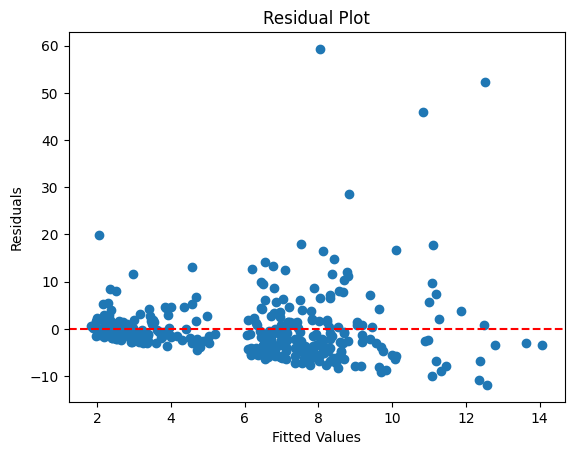

In [86]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [87]:
X = IV_merged[['_mean']]
y = IV_merged['TrainStDist']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TrainStDist   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     22.31
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.39e-06
Time:                        23:58:26   Log-Likelihood:                -1186.9
No. Observations:                 346   AIC:                             2378.
Df Residuals:                     344   BIC:                             2385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7403      0.643      5.818      0.0

In [88]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 11.675053449266679, 'p-value': 0.0006334372090523349, 'f-value': 12.012918652895907, 'f p-value': 0.000595234103156776}


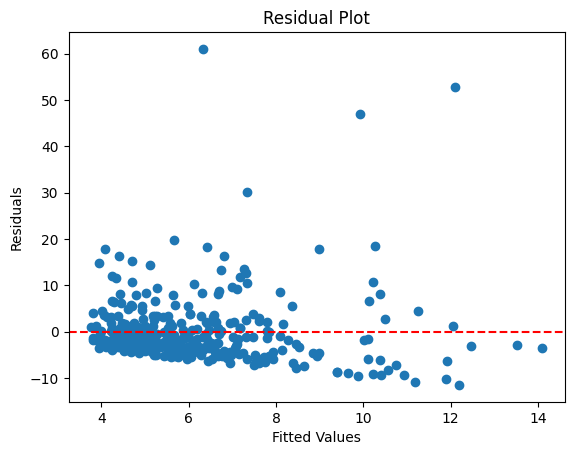

In [89]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### Ports proximity

In [90]:
X = IV_merged[['_mean', 'Exclude_YN']]
y = IV_merged['PortDist']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PortDist   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     41.14
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           9.70e-17
Time:                        23:58:27   Log-Likelihood:                -1427.3
No. Observations:                 346   AIC:                             2861.
Df Residuals:                     343   BIC:                             2872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8525      1.577      7.517      0.0

In [91]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 6.112399781239301, 'p-value': 0.04706621256831371, 'f-value': 3.084185953850162, 'f p-value': 0.047038839425078215}


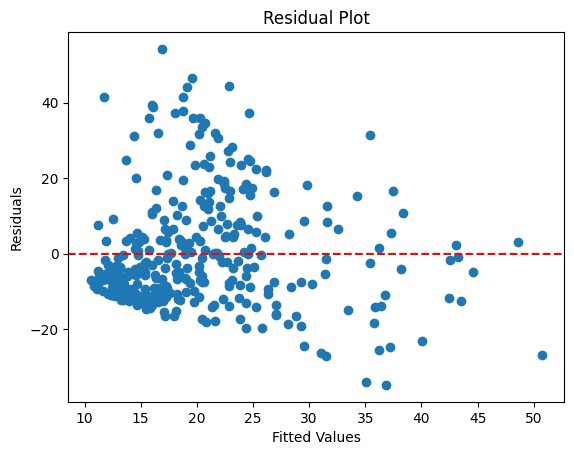

In [92]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [93]:
IV_merged['Exclude_YN'] = IV_merged['Exclude_YN'].astype(int)

X = IV_merged[['_mean']]
y = IV_merged['PortDist']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PortDist   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     81.52
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.26e-17
Time:                        23:58:27   Log-Likelihood:                -1427.7
No. Observations:                 346   AIC:                             2859.
Df Residuals:                     344   BIC:                             2867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0416      1.289      8.563      0.0

In [94]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 4.200207103671324, 'p-value': 0.04041904274795712, 'f-value': 4.227244350909187, 'f p-value': 0.04053412924940337}


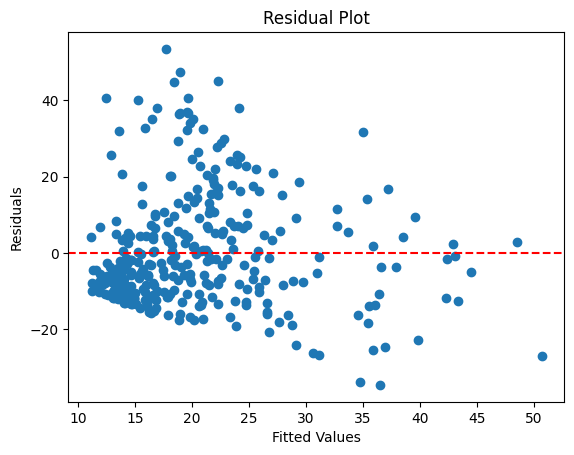

In [95]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Major Cities excluded

In [96]:
IV_merged_excluded = IV_merged[IV_merged['Exclude_YN']!=1]

In [97]:
IV_merged_excluded

,geo_code,name,Area,_mean,_median,_stdev,_min,_max,_variance,Exclude_YN,name_x,TrainStDist,PortDist,CoalDist
0,W06000016,Rhondda Cynon Taf,4.243660e+08,242.193766,230.899994,121.725673,5.5,589.400024,14817.139390,0,Rhondda Cynon Taf,4.269578,25.680358,1.213804
1,W06000013,Bridgend,2.553506e+08,147.901913,106.900002,123.159025,-13.5,567.900024,15168.145558,0,Bridgend,6.388393,10.738420,0.430741
3,E07000166,Richmondshire,1.319717e+09,303.969721,303.299988,166.166947,13.5,714.200012,27611.454139,0,Richmondshire,13.240449,45.418906,0.067920
4,E07000105,Ashford,5.805270e+08,52.800619,44.000000,40.140458,-0.3,194.199997,1611.256332,0,Ashford,4.860615,20.290482,29.862287
7,E07000126,South Ribble,1.147002e+08,29.250217,23.299999,22.300690,-2.8,122.699997,497.320791,0,South Ribble,1.265716,3.670426,7.025444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,E07000086,Eastleigh,8.534621e+07,26.117844,23.900000,16.638386,-1.5,84.500000,276.835894,0,Eastleigh,4.895736,3.990305,83.348245
340,E07000147,North Norfolk,9.942871e+08,34.740663,35.599998,24.823356,-2.8,103.500000,616.198984,0,North Norfolk,20.062249,12.754631,143.299735
342,E07000049,East Dorset,3.546479e+08,54.011188,48.400002,31.177728,6.1,182.699997,972.050725,0,East Dorset,8.596565,17.265345,50.838129
343,E07000046,Torridge,9.960912e+08,130.516205,136.899994,43.000027,-2.5,252.800003,1849.002356,0,Torridge,19.950503,11.213222,10.916762


In [98]:
X = IV_merged_excluded[['_mean']]
y = IV_merged_excluded['TrainStDist']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TrainStDist   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     12.56
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           0.000490
Time:                        23:58:27   Log-Likelihood:                -728.67
No. Observations:                 202   AIC:                             1461.
Df Residuals:                     200   BIC:                             1468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1956      1.041      4.993      0.0

In [99]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 7.2514703578034325, 'p-value': 0.007084298058415199, 'f-value': 7.447009095397285, 'f p-value': 0.006920406802707105}


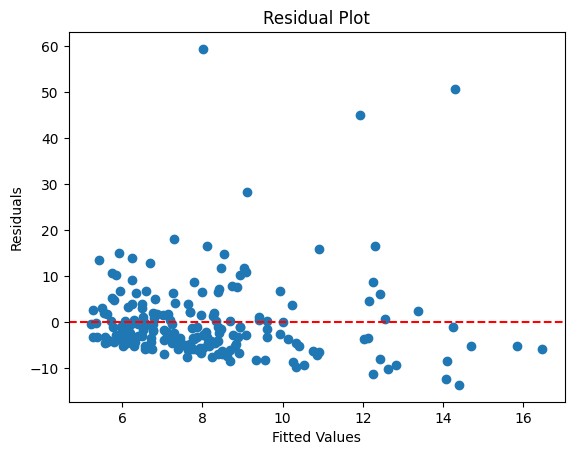

In [100]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [101]:
X = IV_merged_excluded[['_mean']]
y = IV_merged_excluded['PortDist']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PortDist   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     24.55
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.54e-06
Time:                        23:58:28   Log-Likelihood:                -843.12
No. Observations:                 202   AIC:                             1690.
Df Residuals:                     200   BIC:                             1697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7424      1.834      8.039      0.0

In [102]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 0.9323563343352561, 'p-value': 0.33425138069657223, 'f-value': 0.9274056405471064, 'f p-value': 0.3367008830187783}


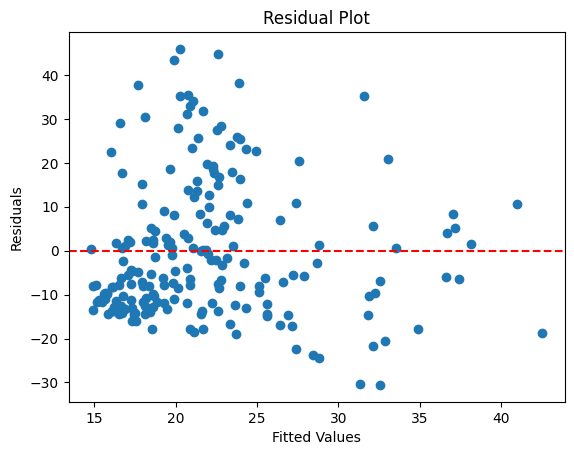

In [103]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [104]:
X = IV_merged_excluded[['_mean']]
y = IV_merged_excluded['CoalDist']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               CoalDist   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     43.73
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.36e-10
Time:                        23:58:28   Log-Likelihood:                -1019.3
No. Observations:                 202   AIC:                             2043.
Df Residuals:                     200   BIC:                             2049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.0166      4.386     15.506      0.0

In [105]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 20.02989049422137, 'p-value': 7.624106118712218e-06, 'f-value': 22.01448419042174, 'f p-value': 5.010265968215659e-06}


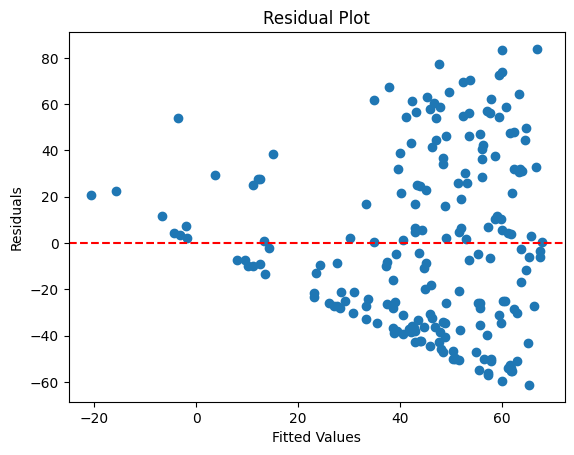

In [106]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Control Variable Verification

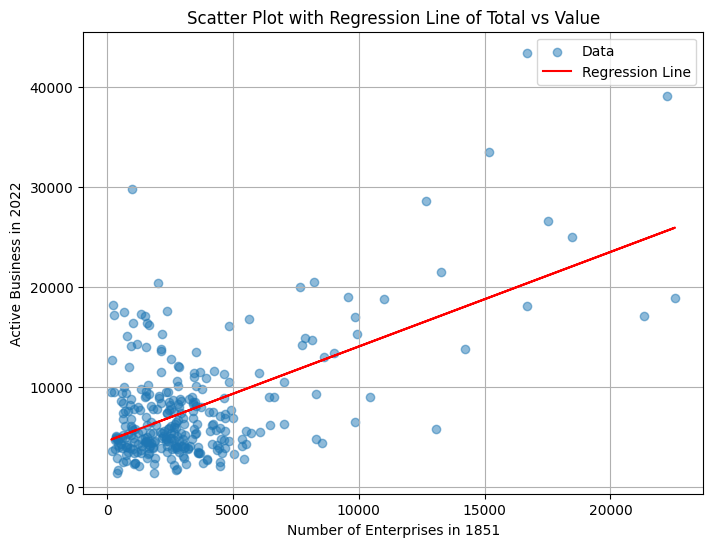

In [107]:
x = joined_df['EntrepreneurCount1851']
y = joined_df['EnterpriseCount2022']

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, m*x + b, color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line of Total vs Value')
plt.xlabel('Number of Enterprises in 1851')
plt.ylabel('Active Business in 2022')
plt.legend()
plt.grid(True)
plt.show()

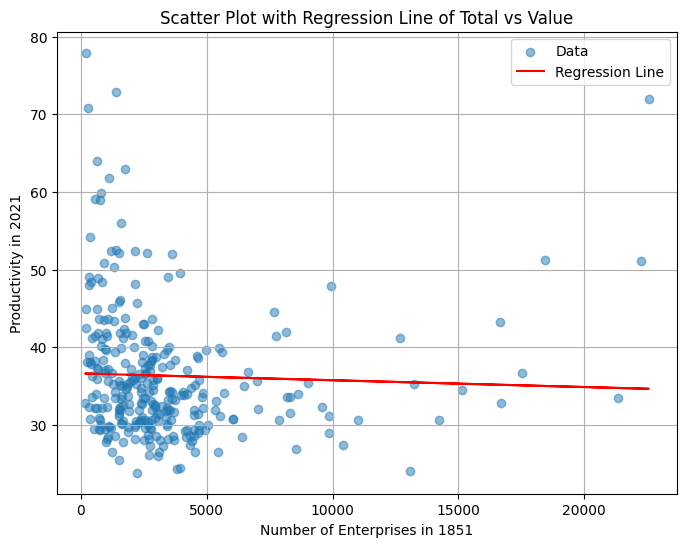

In [108]:
x = joined_df['EntrepreneurCount1851']
y = joined_df['Productivity2021']

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, m*x + b, color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line of Total vs Value')
plt.xlabel('Number of Enterprises in 1851')
plt.ylabel('Productivity in 2021')
plt.legend()
plt.grid(True)
plt.show()

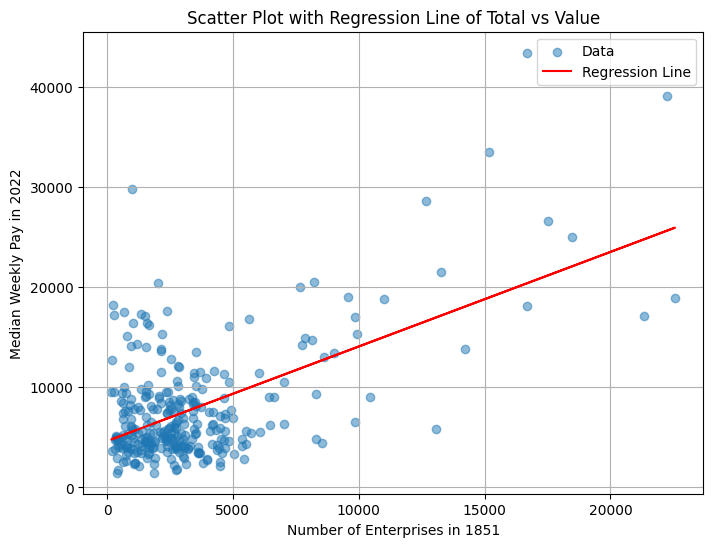

In [109]:
x = joined_df['EntrepreneurCount1851']
y = joined_df['MedianWeeklyPay2022']

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, m*x + b, color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line of Total vs Value')
plt.xlabel('Number of Enterprises in 1851')
plt.ylabel('Median Weekly Pay in 2022')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
X = joined_df[['EntrepreneurCount1851']]
y = joined_df['EnterpriseCount2022']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     EnterpriseCount2022   R-squared:                       0.337
Model:                             OLS   Adj. R-squared:                  0.334
Method:                  Least Squares   F-statistic:                     151.2
Date:                 Thu, 13 Jun 2024   Prob (F-statistic):           2.23e-28
Time:                         23:58:29   Log-Likelihood:                -2960.2
No. Observations:                  300   AIC:                             5924.
Df Residuals:                      298   BIC:                             5932.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [111]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 20.03678744431825, 'p-value': 7.596658388659797e-06, 'f-value': 21.327668745833098, 'f p-value': 5.764949412589048e-06}


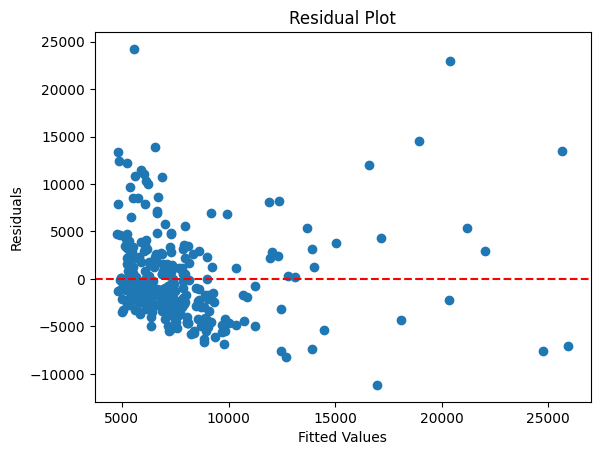

In [112]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Entire Regression using IV

In [113]:
regression_df = pd.merge(joined_df, IV_merged, on="geo_code")

In [114]:
y = regression_df['EnterpriseCount2022']

# Explaing variable: train station proximity
x1 = regression_df['TrainStDist']

# Instrumental variable - slope and major cities
x2 = regression_df[['_mean', 'Exclude_YN']]

# Control variable
z = regression_df['EntrepreneurCount1851']

# First stage
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues

# Second stage: Regress y on x1_hat and z
second_stage = smf.ols('y ~ x1_hat + z', data=regression_df).fit()
print(second_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     155.0
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           7.88e-47
Time:                        23:58:29   Log-Likelihood:                -2914.5
No. Observations:                 300   AIC:                             5835.
Df Residuals:                     297   BIC:                             5846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9666.5004    586.581     16.479      0.0

In [115]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_test_labels, bp_test)))

{'Lagrange multiplier statistic': 20.03678744431825, 'p-value': 7.596658388659797e-06, 'f-value': 21.327668745833098, 'f p-value': 5.764949412589048e-06}


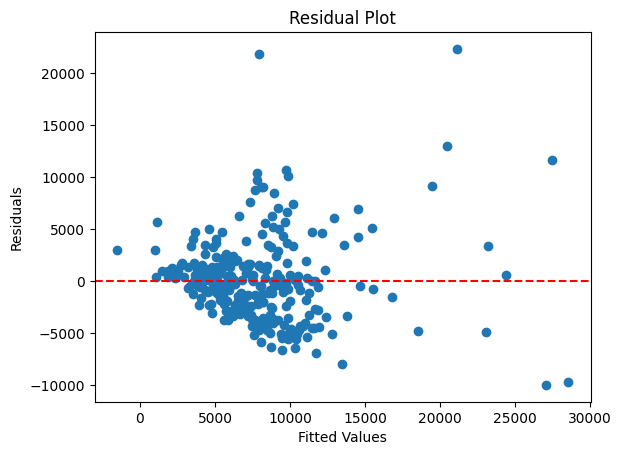

In [116]:
residuals = second_stage.resid
fitted_values = second_stage.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [117]:
regression_df = regression_df.drop('x1_hat', axis=1)

In [118]:
y = regression_df['EnterpriseCount2022']

# Explaing variable: port proximity
x1 = regression_df['PortDist']

# Instrumental variable - slope and major cities
x2 = regression_df[['_mean']]

# Control variable
z = regression_df['EntrepreneurCount1851']

# First stage
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues

# Second stage: Regress y on x1_hat and z
second_stage = smf.ols('y ~ x1_hat + z', data=regression_df).fit()
print(second_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     91.99
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           8.08e-32
Time:                        23:58:30   Log-Likelihood:                -2949.4
No. Observations:                 300   AIC:                             5905.
Df Residuals:                     297   BIC:                             5916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7762.4272    758.728     10.231      0.0

In [119]:
regression_df = regression_df.drop('x1_hat', axis=1)

In [120]:
y = regression_df['EnterpriseCount2022']

# Explaing variable: port proximity
x1 = regression_df['CoalDist']

# Instrumental variable - slope and major cities
x2 = regression_df[['_mean']]

# Control variable
z = regression_df['EntrepreneurCount1851']

# First stage
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues

# Second stage: Regress y on x1_hat and z
second_stage = smf.ols('y ~ x1_hat + z', data=regression_df).fit()
print(second_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     91.99
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           8.08e-32
Time:                        23:58:30   Log-Likelihood:                -2949.4
No. Observations:                 300   AIC:                             5905.
Df Residuals:                     297   BIC:                             5916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1575.9298    742.965      2.121      0.0

In [121]:
regression_df = regression_df.drop('x1_hat', axis=1)

In [122]:
y = regression_df['EnterpriseCount2022']

# Explaing variable: coal proximity
x1 = regression_df['CoalDist']

# Instrumental variable - slope
x2 = regression_df[['_mean']]

# Explaing variable: Train Station proximity
x3 = regression_df['TrainStDist']

# Instrumental variable - slope, major cities
x4 = regression_df[['_mean', 'Exclude_YN']]

# Explaing variable: Port proximity
x5 = regression_df['PortDist']

# Instrumental variable - slope
x6 = regression_df[['_mean']]

# Control variable
z = regression_df['EntrepreneurCount1851']

# First stage - Coal
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues

# First stage 2 - Train Station
first_stage = smf.ols('x3 ~ x4', data=regression_df).fit()
regression_df['x3_hat'] = first_stage.fittedvalues

# First stage 3 - Port
first_stage = smf.ols('x5 ~ x6', data=regression_df).fit()
regression_df['x5_hat'] = first_stage.fittedvalues

# Second stage: Regress y on x1_hat and z
second_stage = smf.ols('y ~ x1_hat + x3_hat + x5_hat  + z', data=regression_df).fit()
print(second_stage.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.8
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.57e-47
Time:                        23:58:30   Log-Likelihood:                -2911.0
No. Observations:                 300   AIC:                             5830.
Df Residuals:                     296   BIC:                             5845.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3730      0.994     10.437      0.0

In [123]:
# To do
# Adding geological variable on the coal mines
# Adding other variables in train/port proximity(?)
# Adding control variables from census data (education, etc.)
# Addressing condition number problem 

### Geological variable for coal mine locations

In [124]:
LAs_geology = pd.read_csv("LAs_geology.csv")
LAs_geology

,geo_code,geo_label,geo_labelw,label,name,Area,OBJECTID,LEX_RCS,PERIOD,TYPE,BASE_TERM,PERIOD_TYP,AGE,ERA,LITHOLOGY,HEX_COLOR,PROCESS,ENVIRONMEN,Shape__Are,Shape__Len
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,4.243660e+08,209,SWUCM-MSCI,Carboniferous,Sedimentary,Siliciclastic And Ferroan Carbonate,Carboniferous - Sedimentary,South Wales Upper Coal Measures Formation,Late Palaeozoic,"Mudstone, Siltstone, Sandstone, Coal, Ironston...",#67A599,Water processes,"A river, coastal or marine environment",2.831706e+09,7.414963e+05
1,S12000013,Eilean Siar,NaN,S92000003S12000013,Eilean Siar,3.264425e+09,166,L-GNSS,Precambrian,Metamorphic,High-Grade Meta-Rock,Precambrian - Metamorphic,Lewisian Complex,Eoarchean To Neoproterozoic,Gneiss,#F74370,Structural and metamorphic processes,Any environment,4.057277e+09,4.866961e+06
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,2.553506e+08,209,SWUCM-MSCI,Carboniferous,Sedimentary,Siliciclastic And Ferroan Carbonate,Carboniferous - Sedimentary,South Wales Upper Coal Measures Formation,Late Palaeozoic,"Mudstone, Siltstone, Sandstone, Coal, Ironston...",#67A599,Water processes,"A river, coastal or marine environment",2.831706e+09,7.414963e+05
3,E07000138,Lincoln,NaN,E92000001E07000138,Lincoln,3.570897e+07,130,LI-MSLS,Triassic To Jurassic,Sedimentary,Siliciclastic And Ferroan Carbonate,Triassic To Jurassic - Sedimentary,Lias Group,Mesozoic,"Mudstone, Siltstone, Limestone And Sandstone",#42AED0,Water and biogenic processes,"A river, coastal or marine environment",8.778213e+09,6.051017e+06
4,E07000166,Richmondshire,NaN,E92000001E07000166,Richmondshire,1.319717e+09,189,MG-MDSS,Carboniferous,Sedimentary,Siliciclastic,Carboniferous - Sedimentary,Millstone Grit Group,Late Palaeozoic,"Mudstone, Siltstone And Sandstone",#67A599,Water processes,"A river, coastal or marine environment",2.172665e+10,3.121199e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,E07000049,East Dorset,NaN,E92000001E07000049,East Dorset,3.546479e+08,132,WHCK-CHLK,Cretaceous,Sedimentary,Carbonate,Cretaceous - Sedimentary,White Chalk Subgroup,Cenozoic,Chalk,#7FC64E,Water and biogenic processes,A coastal or marine environment,2.727562e+10,4.972014e+06
400,E07000046,Torridge,NaN,E92000001E07000046,Torridge,9.960912e+08,70,HOWY-MDSS,Carboniferous,Sedimentary,Siliciclastic,Carboniferous - Sedimentary,Holsworthy Group,Late Palaeozoic,"Mudstone, Siltstone And Sandstone",#67A599,Water processes,"A river, coastal or marine environment",3.023464e+09,9.338277e+05
401,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,2.099006e+08,45,TRIA-MDSS,Triassic,Sedimentary,Siliciclastic,Triassic - Sedimentary,Triassic,Mesozoic,"Mudstone, Siltstone And Sandstone",#812B92,Water and wind processes,"A river, coastal or marine environment",1.682136e+10,5.295135e+06
402,S12000024,Perth & Kinross,NaN,S92000003S12000024,Perth & Kinross,5.421506e+09,167,GRAM-PSSP,Tonian To Ediacaran,Metamorphic,Low-Grade Meta-Siliciclastic,Tonian To Ediacaran - Metamorphic,Grampian Group,Neoproterozoic,Psammite And Semipelite,#FEB342,Water and metamorphic processes,"A river, coastal or marine environment",2.679112e+10,9.812426e+06


In [125]:
IV_merged

,geo_code,name,Area,_mean,_median,_stdev,_min,_max,_variance,Exclude_YN,name_x,TrainStDist,PortDist,CoalDist
0,W06000016,Rhondda Cynon Taf,4.243660e+08,242.193766,230.899994,121.725673,5.500000,589.400024,14817.139390,0,Rhondda Cynon Taf,4.269578,25.680358,1.213804
1,W06000013,Bridgend,2.553506e+08,147.901913,106.900002,123.159025,-13.500000,567.900024,15168.145558,0,Bridgend,6.388393,10.738420,0.430741
2,E07000138,Lincoln,3.570897e+07,19.269098,9.700000,18.822613,0.800000,73.400002,354.290760,1,Lincoln,4.062671,1.248269,27.076794
3,E07000166,Richmondshire,1.319717e+09,303.969721,303.299988,166.166947,13.500000,714.200012,27611.454139,0,Richmondshire,13.240449,45.418906,0.067920
4,E07000105,Ashford,5.805270e+08,52.800619,44.000000,40.140458,-0.300000,194.199997,1611.256332,0,Ashford,4.860615,20.290482,29.862287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,E08000025,Birmingham,2.680010e+08,131.567379,129.100006,28.141977,73.199997,244.000000,791.970879,1,Birmingham,1.555378,32.296657,4.404100
342,E07000049,East Dorset,3.546479e+08,54.011188,48.400002,31.177728,6.100000,182.699997,972.050725,0,East Dorset,8.596565,17.265345,50.838129
343,E07000046,Torridge,9.960912e+08,130.516205,136.899994,43.000027,-2.500000,252.800003,1849.002356,0,Torridge,19.950503,11.213222,10.916762
344,E06000004,Stockton-on-Tees,2.099006e+08,28.438402,28.799999,18.616817,-1.400000,82.000000,346.585888,1,Stockton-on-Tees,0.398228,0.863185,13.524607


In [126]:
EW_geology = pd.merge(IV_merged, LAs_geology, on=["geo_code", "name"])

In [127]:
EW_geology.columns

Index(['geo_code', 'name', 'Area_x', '_mean', '_median', '_stdev', '_min',
       '_max', '_variance', 'Exclude_YN', 'name_x', 'TrainStDist', 'PortDist',
       'CoalDist', 'geo_label', 'geo_labelw', 'label', 'Area_y', 'OBJECTID',
       'LEX_RCS', 'PERIOD', 'TYPE', 'BASE_TERM', 'PERIOD_TYP', 'AGE', 'ERA',
       'LITHOLOGY', 'HEX_COLOR', 'PROCESS', 'ENVIRONMEN', 'Shape__Are',
       'Shape__Len'],
      dtype='object')

In [128]:
EW_geology = EW_geology[['CoalDist','geo_code', 'OBJECTID','LEX_RCS', 'PERIOD', 'TYPE', 'BASE_TERM', 'PERIOD_TYP', 'AGE', 'ERA','LITHOLOGY', 'HEX_COLOR', 'PROCESS', 'ENVIRONMEN']]

In [129]:
X = EW_geology[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

Y = pd.to_numeric(EW_geology["CoalDist"])

model = sm.OLS(Y, X_encoded).fit()

# Model summary
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:               CoalDist   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     49.37
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           4.18e-97
Time:                        23:58:30   Log-Likelihood:                -1505.0
No. Observations:                 346   AIC:                             3066.
Df Residuals:                     318   BIC:                             3174.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [130]:
# Remove the constant column for VIF calculation
X_no_const = X_encoded.drop(columns=['const'])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

print("VIF data before removing multicollinear variables:")
print(vif_data)

# Iteratively remove variables with the highest VIF until all VIFs are below 10
while vif_data["VIF"].max() > 10:
    max_vif_feature = vif_data.sort_values("VIF", ascending=False).iloc[0]
    print(f'Removing {max_vif_feature["feature"]} with VIF {max_vif_feature["VIF"]}')
    X_no_const = X_no_const.drop(columns=[max_vif_feature["feature"]])
    
    # Recalculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_no_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]
#     print(vif_data)

# Adding a constant to the reduced model (intercept)
X_encoded_reduced = sm.add_constant(X_no_const)

# Building the regression model with reduced features
model = sm.OLS(Y, X_encoded_reduced).fit()

# Model summary
model_summary = model.summary()
print(model_summary)

C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF data before removing multicollinear variables:
                                              feature  VIF
0                                PERIOD_Carboniferous  inf
1                     PERIOD_Carboniferous To Permian  inf
2                                   PERIOD_Cretaceous  inf
3                                     PERIOD_Devonian  inf
4                                     PERIOD_Jurassic  inf
..                                                ...  ...
66                   PROCESS_Water and wind processes  inf
67                            PROCESS_Water processes  inf
68  ENVIRONMEN_A river, coastal or marine environment  inf
69  ENVIRONMEN_A river, estuarine or coastal envir...  inf
70                         ENVIRONMEN_Any environment  inf

[71 rows x 2 columns]
Removing PERIOD_Carboniferous with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Carboniferous To Permian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Cretaceous with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Devonian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Jurassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Neogene with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Ordovician with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Palaeogene with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Permian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Silurian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Triassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Triassic To Jurassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing TYPE_Metamorphic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing TYPE_Sedimentary with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Carbonate And Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Low-Grade Meta-Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Mafic Extrusive with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Siliciclastic And Ferroan Carbonate with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Bracklesham And Barton Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Cambrian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Late Palaeozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Early Paleozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_Any environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Early Palaeozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_A river, estuarine or coastal environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Zechstein Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_A river, coastal or marine environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_White Chalk Subgroup with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Warwickshire Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water and wind processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Triassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water and metamorphic processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Mudstone, Siltstone, Limestone And Sandstone with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Ravenscar Group with VIF inf
Removing LITHOLOGY_Mafic Lava with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Mudstone, Siltstone, Sandstone, Coal, Ironstone And Ferricrete with VIF inf
Removing AGE_Thames Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Sandstone And Mudstone with VIF inf
Removing LITHOLOGY_Limestone With Subordinate Sandstone And Argillaceous Rocks with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Neogene To Quaternary with VIF inf
Removing AGE_Inferior Oolite Group with VIF inf
Removing LITHOLOGY_Mudstone, Siltstone And Sandstone with VIF 71.0000000000001


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:               CoalDist   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     49.37
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           4.18e-97
Time:                        23:59:16   Log-Likelihood:                -1505.0
No. Observations:                 346   AIC:                             3066.
Df Residuals:                     318   BIC:                             3174.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [131]:
# Remove the constant column for VIF calculation
X_no_const = X_encoded.drop(columns=['const'])

vif_data = pd.DataFrame()
vif_data["feature"] = X_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

print("VIF data before removing multicollinear variables:")
print(vif_data)

while vif_data["VIF"].max() > 10:
    max_vif_feature = vif_data.sort_values("VIF", ascending=False).iloc[0]
    print(f'Removing {max_vif_feature["feature"]} with VIF {max_vif_feature["VIF"]}')
    X_no_const = X_no_const.drop(columns=[max_vif_feature["feature"]])
    
    # Recalculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_no_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

X_encoded_reduced = sm.add_constant(X_no_const)

model = sm.OLS(Y, X_encoded_reduced).fit()

while True:
    pvalues = model.pvalues
    max_pvalue = pvalues.max()
    if max_pvalue > 0.1:
        feature_to_remove = pvalues.idxmax()
        print(f"Removing {feature_to_remove} with p-value {max_pvalue}")
        X_encoded_reduced = X_encoded_reduced.drop(columns=[feature_to_remove])
        model = sm.OLS(Y, X_encoded_reduced).fit()
    else:
        break

model_summary = model.summary()
print(model_summary)

C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF data before removing multicollinear variables:
                                              feature  VIF
0                                PERIOD_Carboniferous  inf
1                     PERIOD_Carboniferous To Permian  inf
2                                   PERIOD_Cretaceous  inf
3                                     PERIOD_Devonian  inf
4                                     PERIOD_Jurassic  inf
..                                                ...  ...
66                   PROCESS_Water and wind processes  inf
67                            PROCESS_Water processes  inf
68  ENVIRONMEN_A river, coastal or marine environment  inf
69  ENVIRONMEN_A river, estuarine or coastal envir...  inf
70                         ENVIRONMEN_Any environment  inf

[71 rows x 2 columns]
Removing PERIOD_Carboniferous with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Carboniferous To Permian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Cretaceous with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Devonian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Jurassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Neogene with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Ordovician with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Palaeogene with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Permian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Silurian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Triassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Triassic To Jurassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing TYPE_Metamorphic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing TYPE_Sedimentary with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Carbonate And Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Low-Grade Meta-Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Mafic Extrusive with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Siliciclastic And Ferroan Carbonate with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Bracklesham And Barton Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Cambrian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Late Palaeozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Early Paleozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_Any environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Early Palaeozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_A river, estuarine or coastal environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Zechstein Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_A river, coastal or marine environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_White Chalk Subgroup with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Warwickshire Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water and wind processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Triassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water and metamorphic processes with VIF inf
Removing LITHOLOGY_Mudstone, Siltstone, Limestone And Sandstone with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Ravenscar Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Mafic Lava with VIF inf
Removing LITHOLOGY_Mudstone, Siltstone, Sandstone, Coal, Ironstone And Ferricrete with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Thames Group with VIF inf
Removing LITHOLOGY_Sandstone And Mudstone with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Limestone With Subordinate Sandstone And Argillaceous Rocks with VIF inf
Removing AGE_Neogene To Quaternary with VIF inf
Removing AGE_Inferior Oolite Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Mudstone, Siltstone And Sandstone with VIF 71.0000000000001
Removing LITHOLOGY_Metasedimentary Rock with p-value 0.9537712002470524
Removing LITHOLOGY_Sandstone, Siltstone And Mudstone with p-value 0.9466602597092321
Removing AGE_Pennine Middle Coal Measures And South Wales Middle Coal Measures Formation with p-value 0.805996958470138
Removing LITHOLOGY_Siltstone And Sandstone With Subordinate Mudstone with p-value 0.8439047183454057
Removing AGE_Millstone Grit Group with p-value 0.848545177835458
Removing AGE_South Wales Upper Coal Measures Formation with p-value 0.8296858902961104
Removing AGE_Ordovician with p-value 0.5029824818944477
Removing ERA_Late Proterozoic with p-value 0.46163233578040563
Removing const with p-value 0.4291006655166437
Removing LITHOLOGY_Sandstone And Conglomerate, Interbedded with p-value 0.42676547943678633
Removing AGE_Silurian with p-value 0.32440025604342504
                                 OLS Regression Results                       

In [132]:
# bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
# bp_test_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
# print(dict(zip(bp_test_labels, bp_test)))

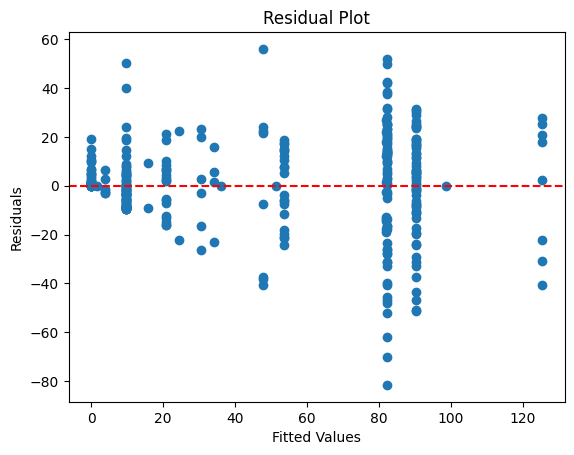

In [133]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create the residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [134]:
coal_regression_df= pd.merge(regression_df, EW_geology, on="geo_code")

In [135]:
y = coal_regression_df['EnterpriseCount2022']

# Explaing variable: port proximity
x1 = coal_regression_df['CoalDist_x']

# Instrumental variable - geological variables
X = coal_regression_df[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[['AGE_Caradoc', 'AGE_Devonian', 'AGE_Dinantian', 'AGE_Greensand Group',
       'AGE_Holsworthy Group', 'AGE_Kellaways And Oxford Clay Formation',
       'AGE_Lias Group', 'AGE_Permian', 'AGE_Pridoli',
       'AGE_Thanet Sand Formation', 'ERA_Mesozoic',
       'LITHOLOGY_Clay, Silt, Sand And Gravel',
       'LITHOLOGY_Dolomitised Limestone And Dolomite',
       'LITHOLOGY_Gravel, Sand, Silt And Clay',
#        'LITHOLOGY_Limestone, Sandstone, Siltstone And Mudstone', # Excluded because there is no such variable within the study dataset
       'LITHOLOGY_Sand, Silt And Clay',
       'PROCESS_Water and biogenic processes']]

# Control variable
z = regression_df['EntrepreneurCount1851']

# First stage
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat and z
print("\n\nSecond stage: Regress y on x1_hat and z")
second_stage = smf.ols('y ~ x1_hat + z', data=regression_df).fit()
print(second_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat', data=regression_df).fit()
print(second_stage.summary())

First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     84.26
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.68e-97
Time:                        23:59:59   Log-Likelihood:                -1290.2
No. Observations:                 300   AIC:                             2614.
Df Residuals:                     283   BIC:                             2677.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3815      2.455      0.

## Control Variable - population

In [136]:
# Load datasets
bbce_panel = pd.read_stata('flatpacked_data/HistoricalCensuses/BBCE/BBCE_panel.dta')
bbce = pd.read_stata('flatpacked_data/HistoricalCensuses/BBCE/BBCE.dta')
census = pd.read_stata('flatpacked_data/HistoricalCensuses/IPUMS/Census.dta', convert_categoricals=False)


In [137]:
bbce.columns

Index(['year', 'recid', 'empstatus_ind', 'etot', 'emen', 'ewom', 'eboy',
       'egirl', 'eother', 'acre'],
      dtype='object')

In [138]:
bbce_panel.columns

Index(['age51', 'age61', 'age71', 'age81', 'age91', 'recid51', 'recid61',
       'snid', 'recid81', 'recid91'],
      dtype='object')

In [139]:
census.columns

Index(['recid', 'year', 'serial', 'persons', 'hhwt', 'geo1_uk1851_1911',
       'countyuk', 'distuk', 'subdistuk', 'headloc', 'pernum', 'perwt',
       'momloc', 'poploc', 'sploc', 'relate', 'related', 'age', 'sex',
       'birthyr', 'nativity', 'bplcountry', 'bpluk', 'labforce', 'isco68a',
       'disabled', 'occisco', 'occhisco', 'occicem', 'Conparid'],
      dtype='object')

In [140]:
census

,recid,year,serial,persons,hhwt,geo1_uk1851_1911,countyuk,distuk,subdistuk,headloc,...,nativity,bplcountry,bpluk,labforce,isco68a,disabled,occisco,occhisco,occicem,Conparid
0,46726,1881,1.003800e+07,8,1,826001,1,103,10001,1,...,1,42120,10,1,999,2,99,99999,999,1.0
1,81536,1881,1.652800e+07,3,1,826001,1,103,10011,1,...,1,42120,7,2,560,2,5,56000,105,1.0
2,51051,1861,1.047000e+07,5,1,826001,1,103,10011,1,...,1,42120,3,8,999,2,99,99999,999,1.0
3,79521,1881,1.614100e+07,6,1,826001,1,103,10011,1,...,1,42120,8,1,999,2,99,99999,999,1.0
4,30352,1851,6.031000e+06,11,1,826001,1,103,10011,5,...,1,42120,7,9,999,2,99,99999,999,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63664171,19668060,1861,4.134074e+09,2,1,826012,60,6202,600002,1,...,1,42120,60,2,641,2,6,64100,194,NaN
63664172,19791633,1861,4.150887e+09,2,1,826099,200,9998,900003,0,...,9,99999,999,8,999,2,99,99999,999,NaN
63664173,19608924,1861,4.121485e+09,6,1,826012,61,6100,610000,1,...,1,42120,61,8,999,2,99,99999,999,NaN
63664174,17666794,1851,3.722202e+09,8,1,826012,62,6201,620000,1,...,1,42120,999,9,999,2,99,99999,787,NaN


In [141]:
LAs_parishes_joined = pd.read_csv("LAs_parishes_joined.csv")
LAs_parishes_joined

,CONPARID_f,Area,geo_code,geo_label,geo_labelw,label,name,Area_2
0,0,1.985,E07000137,East Lindsey,NaN,E92000001E07000137,East Lindsey,1.830120e+09
1,1,4.999,E41000324,"City of London,Westminster",NaN,E92000001E41000324,"City of London,Westminster",2.519132e+07
2,2,8.518,E09000020,Kensington and Chelsea,NaN,E92000001E09000020,Kensington and Chelsea,1.239479e+07
3,3,8.970,E09000013,Hammersmith and Fulham,NaN,E92000001E09000013,Hammersmith and Fulham,1.716828e+07
4,4,7.012,E09000013,Hammersmith and Fulham,NaN,E92000001E09000013,Hammersmith and Fulham,1.716828e+07
...,...,...,...,...,...,...,...,...
12715,12751,8.472,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,7.490414e+08
12716,12752,4.091,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,7.490414e+08
12717,12753,7.282,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,7.490414e+08
12718,12754,9.132,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,7.490414e+08


In [142]:
census_1851 = census[census['year']==1851]

In [143]:
len(census_1851)

17711030

In [144]:
census_1851_with_LAs = pd.merge(census_1851, LAs_parishes_joined[['CONPARID_f', 'geo_code']], left_on = "Conparid", right_on="CONPARID_f")

In [145]:
LAs_population = census_1851_with_LAs.groupby('geo_code').size().to_frame(name='population')

In [146]:
LAs_population = LAs_population.reset_index()
LAs_population

,geo_code,population
0,E06000001,15710
1,E06000002,631
2,E06000003,10523
3,E06000004,14910
4,E06000005,17639
...,...,...
340,W06000020,26000
341,W06000021,57158
342,W06000022,28860
343,W06000023,143839


## Control variable - labor force

In [147]:
tmp4 = census_1851_with_LAs.groupby(['geo_code','labforce']).size().to_frame(name="count")

In [148]:
tmp4 = tmp4.reset_index()

In [149]:
LAs_labforce = tmp4.groupby('geo_code').sum().reset_index().merge(tmp4[tmp4['labforce']==2], on="geo_code")

In [150]:
LAs_labforce['labforce_ratio'] = LAs_labforce['count_y']/LAs_labforce['count_x']

In [151]:
LAs_labforce = LAs_labforce[['geo_code','labforce_ratio']]  

In [152]:
LAs_labforce

,geo_code,labforce_ratio
0,E06000001,0.388160
1,E06000002,0.508716
2,E06000003,0.430010
3,E06000004,0.401476
4,E06000005,0.434548
...,...,...
340,W06000020,0.388615
341,W06000021,0.427324
342,W06000022,0.429834
343,W06000023,0.435320


## Control variable - labor force -  average age, sex ratio,  'momloc' + 'poploc' ratio, 'nativity' ratio, 'disabled' ratio, Industry ratio

In [153]:
# adding other variables
# average age, sex ratio,  'momloc' + 'poploc' ratio, 'nativity' ratio, 'disabled' ratio, occupation ratio(?)

In [154]:
census_1851_with_LAs

,recid,year,serial,persons,hhwt,geo1_uk1851_1911,countyuk,distuk,subdistuk,headloc,...,bpluk,labforce,isco68a,disabled,occisco,occhisco,occicem,Conparid,CONPARID_f,geo_code
0,30352,1851,6.031000e+06,11,1,826001,1,103,10011,5,...,7,9,999,2,99,99999,999,1.0,1,E41000324
1,15460,1851,3.257000e+06,6,1,826001,1,103,10001,1,...,3,2,540,2,5,54020,84,1.0,1,E41000324
2,31967,1851,6.385000e+06,8,1,826001,1,103,10011,1,...,7,9,999,2,99,99999,787,1.0,1,E41000324
3,23705,1851,4.616000e+06,7,1,826001,1,103,10011,1,...,7,1,999,2,99,99999,778,1.0,1,E41000324
4,25810,1851,5.110000e+06,2,1,826001,1,103,10011,1,...,14,2,839,2,7,83890,295,1.0,1,E41000324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571239,17567462,1851,3.701277e+09,2,1,826012,56,5601,560007,1,...,56,1,999,2,99,99999,999,12755.0,12755,W06000001
17571240,17567055,1851,3.701185e+09,4,1,826012,56,5601,560007,1,...,56,9,999,2,99,99999,999,12755.0,12755,W06000001
17571241,17568424,1851,3.701490e+09,6,1,826012,56,5601,560007,1,...,56,1,999,2,99,99999,999,12755.0,12755,W06000001
17571242,17564618,1851,3.700621e+09,10,1,826012,56,5601,560007,1,...,56,2,540,2,5,54020,84,12755.0,12755,W06000001


In [155]:
LAs_age_mean = census_1851_with_LAs.groupby('geo_code')['age'].mean().reset_index()


In [156]:
LAs_age_mean

,geo_code,age
0,E06000001,69.111394
1,E06000002,60.309033
2,E06000003,66.599354
3,E06000004,33.551375
4,E06000005,57.309201
...,...,...
340,W06000020,25.295808
341,W06000021,28.792662
342,W06000022,26.902772
343,W06000023,29.260235


In [157]:
sex_counts = census_1851_with_LAs.groupby(['geo_code', 'sex']).size().unstack(fill_value=0)
sex_counts['total'] = sex_counts.sum(axis=1)

# Calculate the ratio of each sex
sex_counts['male_ratio'] = sex_counts[1] / sex_counts['total']
sex_counts['female_ratio'] = sex_counts[2] / sex_counts['total']

# Optionally, drop the total column if no longer needed
sex_counts.drop('total', axis=1, inplace=True)

In [158]:
sex_counts = sex_counts.reset_index()

In [159]:
sex_counts

sex,geo_code,1,2,9,male_ratio,female_ratio
0,E06000001,7536,7727,447,0.479694,0.491852
1,E06000002,329,290,12,0.521395,0.459588
2,E06000003,5133,5125,265,0.487789,0.487028
3,E06000004,6729,7733,448,0.451308,0.518645
4,E06000005,7966,9243,430,0.451613,0.524009
...,...,...,...,...,...,...
340,W06000020,12997,12414,589,0.499885,0.477462
341,W06000021,27894,27936,1328,0.488016,0.488750
342,W06000022,13718,14141,1001,0.475329,0.489986
343,W06000023,70941,70919,1979,0.493197,0.493044


In [160]:
census_1851_with_LAs['momloc'].value_counts()

momloc
0     10352899
2      5977452
1       903627
3        99025
4        69847
5        51860
6        40791
7        28874
8        19383
9        11869
10        6541
11        3636
12        2091
13        1177
14         662
15         353
17         254
16         238
18         180
19         120
21         101
20          75
22          70
23          45
24          22
25          17
26          16
27          14
28           5
Name: count, dtype: int64

In [161]:
ratio_momloc_zero = census_1851_with_LAs.groupby('geo_code').agg(
    momloc_0_ratio=('momloc', lambda x: (x == 0).mean())
).reset_index()

In [162]:
ratio_momloc_zero

,geo_code,momloc_0_ratio
0,E06000001,0.632145
1,E06000002,0.679873
2,E06000003,0.660553
3,E06000004,0.590141
4,E06000005,0.613243
...,...,...
340,W06000020,0.557192
341,W06000021,0.611323
342,W06000022,0.611573
343,W06000023,0.609995


In [163]:
ratio_poploc_zero = census_1851_with_LAs.groupby('geo_code').agg(
    poploc_0_ratio=('poploc', lambda x: (x == 0).mean())
).reset_index()

In [164]:
ratio_poploc_zero

,geo_code,poploc_0_ratio
0,E06000001,0.679949
1,E06000002,0.687797
2,E06000003,0.695714
3,E06000004,0.636351
4,E06000005,0.663586
...,...,...
340,W06000020,0.581923
341,W06000021,0.642290
342,W06000022,0.650485
343,W06000023,0.639576


In [165]:
ratio_nativity = census_1851_with_LAs.groupby('geo_code').agg(
    nativity_ratio=('nativity', lambda x: (x == 1).mean())
).reset_index()

In [166]:
ratio_nativity

,geo_code,nativity_ratio
0,E06000001,0.942202
1,E06000002,0.990491
2,E06000003,0.981659
3,E06000004,0.954326
4,E06000005,0.957991
...,...,...
340,W06000020,0.938500
341,W06000021,0.969995
342,W06000022,0.898822
343,W06000023,0.985373


In [167]:
ratio_disabled = census_1851_with_LAs.groupby('geo_code').agg(
    disabled_ratio=('disabled', lambda x: (x == 1).mean())
).reset_index()

In [168]:
ratio_disabled

,geo_code,disabled_ratio
0,E06000001,0.001018
1,E06000002,0.000000
2,E06000003,0.001520
3,E06000004,0.001341
4,E06000005,0.001587
...,...,...
340,W06000020,0.001308
341,W06000021,0.003044
342,W06000022,0.001802
343,W06000023,0.002280


In [169]:
census_1851_with_LAs.columns

Index(['recid', 'year', 'serial', 'persons', 'hhwt', 'geo1_uk1851_1911',
       'countyuk', 'distuk', 'subdistuk', 'headloc', 'pernum', 'perwt',
       'momloc', 'poploc', 'sploc', 'relate', 'related', 'age', 'sex',
       'birthyr', 'nativity', 'bplcountry', 'bpluk', 'labforce', 'isco68a',
       'disabled', 'occisco', 'occhisco', 'occicem', 'Conparid', 'CONPARID_f',
       'geo_code'],
      dtype='object')

In [170]:
primary_codes = [
    '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', 
    '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', 
    '207', '208', '209', '210', '211', '212', '213', '224', '225', '230', '231', '232'
]

secondary_codes = [
    '204', '205', '206', '214', '215', '216', '217', '218', '219', '220', '226', '227', '228', 
    '229', '241', '242', '243', '244', '245', '246', '248', '249', '250', '251', '252', '253', 
    '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', 
    '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', 
    '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '300', '301', 
    '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', 
    '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', 
    '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', 
    '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', 
    '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', 
    '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', 
    '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', 
    '393', '394', '395', '396', '397', '398', '399', '405', '406', '407', '408', '409', '410', 
    '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', 
    '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', 
    '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', 
    '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '464', 
    '465', '466', '467', '468', '469', '470', '474', '475', '476', '477', '478', '479', '480', 
    '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', 
    '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', 
    '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', 
    '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', 
    '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', 
    '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', 
    '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', 
    '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', 
    '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', 
    '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', 
    '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', 
    '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', 
    '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', 
    '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', 
    '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '673', '674', '675', 
    '676', '677', '678', '679', '680', '681', '682', '683', '684', '685', '686', '687', '688', 
    '689', '690', '691', '692', '693', '694', '695', '696', '697', '698', '699', '700', '701', 
    '702', '703', '704', '705', '706', '707', '708', '709', '710'
]

tertiary_codes = [
    '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', 
    '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', 
    '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', 
    '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', 
    '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', 
    '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', 
    '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', 
    '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', 
    '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', 
    '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 
    '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', 
    '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 
    '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', 
    '170', '171', '172', '201', '202', '203', '233', '234'
]

In [171]:
primary_codes_set = set(map(int, primary_codes))
secondary_codes_set = set(map(int, secondary_codes))
tertiary_codes_set = set(map(int, tertiary_codes))

# Combine all codes into one set
all_codes_set = primary_codes_set.union(secondary_codes_set, tertiary_codes_set)

# Create a set of all numbers from 001 to 797
all_numbers_set = set(range(1, 798))

# Find omitted numbers
omitted_numbers = sorted(all_numbers_set - all_codes_set)
omitted_numbers

[186,
 187,
 221,
 222,
 223,
 235,
 236,
 237,
 238,
 239,
 240,
 247,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 400,
 401,
 402,
 403,
 404,
 462,
 463,
 471,
 472,
 473,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797]

In [172]:
# Classification of the provided codes

# Primary Industry Codes
primary_codes.extend([
    '186', '187', '221', '222', '223', 
    '235', '236', '237', '238', '239', '240'
])

# Secondary Industry Codes
secondary_codes.extend([
    '247', '291', '292', '293', '294', '295', '296', '297', '298', '299',
    '400', '401', '402', '403', '404', '462'
])

# Tertiary Industry Codes
tertiary_codes.extend([
    '463', '471', '472', '473', '711', '712', '713', '714', '715', '716', '717', '718', '719',
    '720', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732',
    '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745',
    '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758',
    '759', '760', '761', '762', '763', '764', '765', '766', '767', '768', '769', '770', '771',
    '772', '773', '774', '775', '776', '777', '778', '779', '780', '781', '782', '783', '784',
    '785', '786', '787', '788', '789', '790', '791', '792', '793', '794', '795', '796', '797'
])


In [173]:
primary_codes = [
    173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 
    188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 
    207, 208, 209, 210, 211, 212, 213, 224, 225, 230, 231, 232
]

secondary_codes = [
    204, 205, 206, 214, 215, 216, 217, 218, 219, 220, 226, 227, 228, 
    229, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 253, 
    254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 
    267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 
    280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 300, 301, 
    302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 
    315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 
    328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 
    341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 
    354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 
    367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 
    380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 
    393, 394, 395, 396, 397, 398, 399, 405, 406, 407, 408, 409, 410, 
    411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 
    424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 
    437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 
    450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 464, 
    465, 466, 467, 468, 469, 470, 474, 475, 476, 477, 478, 479, 480, 
    481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 
    494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 
    507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 
    520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 
    533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 
    546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 
    559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 
    572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 
    585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 
    598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 
    611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 
    624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 
    637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 
    650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 
    663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 
    676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 
    689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 
    702, 703, 704, 705, 706, 707, 708, 709, 710
]

tertiary_codes = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 
    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 
    27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
    40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 
    53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 
    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 
    79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 
    92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 
    105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 
    118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 
    131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 
    144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 
    157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 
    170, 171, 172, 201, 202, 203, 233, 234
]

In [174]:
# Classification of the provided codes

# Primary Industry Codes
primary_codes.extend([
    186, 187, 221, 222, 223, 
    235, 236, 237, 238, 239, 240
])

# Secondary Industry Codes
secondary_codes.extend([
    247, 291, 292, 293, 294, 295, 296, 297, 298, 299,
    400, 401, 402, 403, 404, 462
])

# Tertiary Industry Codes
tertiary_codes.extend([
    463, 471, 472, 473, 711, 712, 713, 714, 715, 716, 717, 718, 719,
    720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732,
    733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745,
    746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758,
    759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771,
    772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784,
    785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797
])


In [175]:
len(primary_codes)

49

In [176]:
len(secondary_codes)

480

In [177]:
len(tertiary_codes)

268

In [178]:
len(primary_codes)+len(secondary_codes)+len(tertiary_codes)

797

In [179]:
def classify_occupation(code):
    if code in primary_codes:
        return 'primary'
    elif code in secondary_codes:
        return 'secondary'
    elif code in tertiary_codes:
        return 'tertiary'
    else:
        return 'unknown'  # For codes that do not fall into any category

census_1851_with_LAs['industry'] = census_1851_with_LAs['occicem'].apply(classify_occupation)

In [180]:
census_1851_with_LAs['industry']

0             unknown
1            tertiary
2            tertiary
3            tertiary
4           secondary
              ...    
17571239      unknown
17571240      unknown
17571241      unknown
17571242     tertiary
17571243      unknown
Name: industry, Length: 17571244, dtype: object

In [181]:
industry_counts = census_1851_with_LAs.groupby(['geo_code', 'industry']).size().unstack(fill_value=0)
industry_counts['total'] = industry_counts.sum(axis=1)

industry_counts['primary_ratio'] = industry_counts['primary'] / industry_counts['total']
industry_counts['secondary_ratio'] = industry_counts['secondary'] / industry_counts['total']
industry_counts['tertiary_ratio'] = industry_counts['tertiary'] / industry_counts['total']

industry_counts.drop('total', axis=1, inplace=True)

In [182]:
industry_counts = industry_counts.reset_index()
industry_counts

industry,geo_code,primary,secondary,tertiary,unknown,primary_ratio,secondary_ratio,tertiary_ratio
0,E06000001,969,2375,6572,5794,0.061680,0.151178,0.418332
1,E06000002,203,46,236,146,0.321712,0.072900,0.374010
2,E06000003,2121,1379,3572,3451,0.201558,0.131046,0.339447
3,E06000004,1021,2955,6110,4824,0.068478,0.198189,0.409792
4,E06000005,1838,3440,7826,4535,0.104201,0.195022,0.443676
...,...,...,...,...,...,...,...,...
340,W06000020,3893,3795,7719,10593,0.149731,0.145962,0.296885
341,W06000021,9653,7275,21369,18861,0.168883,0.127279,0.373858
342,W06000022,2220,4507,12299,9834,0.076923,0.156168,0.426161
343,W06000023,34322,16693,49326,43498,0.238614,0.116053,0.342925


In [183]:
regression_df = regression_df.merge(LAs_population,on='geo_code').merge(LAs_labforce,on='geo_code').merge(LAs_age_mean,on='geo_code').merge(sex_counts,on='geo_code').merge(ratio_momloc_zero,on='geo_code').merge(ratio_poploc_zero,on='geo_code').merge(ratio_nativity,on='geo_code').merge(ratio_disabled,on='geo_code').merge(industry_counts,on='geo_code')

In [184]:
regression_df.columns

Index([             'geo_code',   'MedianWeeklyPay2022',
            'Productivity2021',             'Area name',
                 'Time period',   'EnterpriseCount2022',
       'EntrepreneurCount1851',                  'name',
                        'Area',                 '_mean',
                     '_median',                '_stdev',
                        '_min',                  '_max',
                   '_variance',            'Exclude_YN',
                      'name_x',           'TrainStDist',
                    'PortDist',              'CoalDist',
                      'x1_hat',                'x3_hat',
                      'x5_hat',            'population',
              'labforce_ratio',                   'age',
                             1,                       2,
                             9,            'male_ratio',
                'female_ratio',        'momloc_0_ratio',
              'poploc_0_ratio',        'nativity_ratio',
              'disabled_ratio',

#  Descriptive Statistics

# Enterprise Count 2022 as Y

In [185]:
y = coal_regression_df['EnterpriseCount2022']

# Explaing variable: port proximity
x1 = coal_regression_df['CoalDist_x']

# Instrumental variable - geological variables
X = coal_regression_df[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[['AGE_Caradoc', 'AGE_Devonian', 'AGE_Dinantian', 'AGE_Greensand Group',
       'AGE_Holsworthy Group', 'AGE_Kellaways And Oxford Clay Formation',
       'AGE_Lias Group', 'AGE_Permian', 'AGE_Pridoli',
       'AGE_Thanet Sand Formation', 'ERA_Mesozoic',
       'LITHOLOGY_Clay, Silt, Sand And Gravel',
       'LITHOLOGY_Dolomitised Limestone And Dolomite',
       'LITHOLOGY_Gravel, Sand, Silt And Clay',
#        'LITHOLOGY_Limestone, Sandstone, Siltstone And Mudstone', # Excluded because there is no such variable within the study dataset
       'LITHOLOGY_Sand, Silt And Clay',
       'PROCESS_Water and biogenic processes']]


# First stage
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat', data=regression_df).fit()
print(second_stage.summary())


# Control variable
control_var_list = ['EntrepreneurCount1851','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = regression_df[control_var_list[:i]]
    
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ x1_hat + z', data=regression_df).fit()
    print(second_stage.summary())


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     84.26
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.68e-97
Time:                        00:04:22   Log-Likelihood:                -1290.2
No. Observations:                 300   AIC:                             2614.
Df Residuals:                     283   BIC:                             2677.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3815      2.455      0.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     34.23
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           7.66e-38
Time:                        00:04:22   Log-Likelihood:                -2922.3
No. Observations:                 300   AIC:                             5863.
Df Residuals:                     291   BIC:                             5896.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3153.5405   9452.932     -0.334      0.7

In [186]:
y = coal_regression_df['EnterpriseCount2022']


# Control variable
control_var_list = ['EntrepreneurCount1851','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = regression_df[control_var_list[:i]]
    
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ CoalDist + z', data=regression_df).fit()
    print(second_stage.summary())




Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     92.49
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.95e-32
Time:                        00:04:22   Log-Likelihood:                -2949.1
No. Observations:                 300   AIC:                             5904.
Df Residuals:                     297   BIC:                             5915.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     29.66
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.69e-41
Time:                        00:04:22   Log-Likelihood:                -2908.1
No. Observations:                 300   AIC:                             5840.
Df Residuals:                     288   BIC:                             5885.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.498e+04   1.69e+04      1.476      0.1

# Productivity in 2021 as Y

In [187]:
y = coal_regression_df['Productivity2021']

# Explaing variable: port proximity
x1 = coal_regression_df['CoalDist_x']

# Instrumental variable - geological variables
X = coal_regression_df[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[['AGE_Caradoc', 'AGE_Devonian', 'AGE_Dinantian', 'AGE_Greensand Group',
       'AGE_Holsworthy Group', 'AGE_Kellaways And Oxford Clay Formation',
       'AGE_Lias Group', 'AGE_Permian', 'AGE_Pridoli',
       'AGE_Thanet Sand Formation', 'ERA_Mesozoic',
       'LITHOLOGY_Clay, Silt, Sand And Gravel',
       'LITHOLOGY_Dolomitised Limestone And Dolomite',
       'LITHOLOGY_Gravel, Sand, Silt And Clay',
#        'LITHOLOGY_Limestone, Sandstone, Siltstone And Mudstone', # Excluded because there is no such variable within the study dataset
       'LITHOLOGY_Sand, Silt And Clay',
       'PROCESS_Water and biogenic processes']]


# First stage
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat', data=regression_df).fit()
print(second_stage.summary())


# Control variable
control_var_list = ['EntrepreneurCount1851','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = regression_df[control_var_list[:i]]
    
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ x1_hat + z', data=regression_df).fit()
    print(second_stage.summary())


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     84.26
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.68e-97
Time:                        00:04:22   Log-Likelihood:                -1290.2
No. Observations:                 300   AIC:                             2614.
Df Residuals:                     283   BIC:                             2677.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3815      2.455      0.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     8.215
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.97e-10
Time:                        00:04:22   Log-Likelihood:                -1034.9
No. Observations:                 300   AIC:                             2088.
Df Residuals:                     291   BIC:                             2121.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.7749     17.514      1.015      0.3

In [188]:
y = coal_regression_df['Productivity2021']

# Control variable
control_var_list = ['EntrepreneurCount1851','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = regression_df[control_var_list[:i]]
    
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ CoalDist + z', data=regression_df).fit()
    print(second_stage.summary())




Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     37.37
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           3.34e-15
Time:                        00:04:23   Log-Likelihood:                -1031.8
No. Observations:                 300   AIC:                             2070.
Df Residuals:                     297   BIC:                             2081.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     11.66
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.46e-13
Time:                        00:04:23   Log-Likelihood:                -1028.5
No. Observations:                 300   AIC:                             2073.
Df Residuals:                     292   BIC:                             2103.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5499      7.833      3.006      0.0



Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     9.538
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.15e-14
Time:                        00:04:23   Log-Likelihood:                -1018.9
No. Observations:                 300   AIC:                             2062.
Df Residuals:                     288   BIC:                             2106.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

# Median Weekly Pay in 2022 as Y

In [189]:
regression_df.columns

Index([             'geo_code',   'MedianWeeklyPay2022',
            'Productivity2021',             'Area name',
                 'Time period',   'EnterpriseCount2022',
       'EntrepreneurCount1851',                  'name',
                        'Area',                 '_mean',
                     '_median',                '_stdev',
                        '_min',                  '_max',
                   '_variance',            'Exclude_YN',
                      'name_x',           'TrainStDist',
                    'PortDist',              'CoalDist',
                      'x1_hat',                'x3_hat',
                      'x5_hat',            'population',
              'labforce_ratio',                   'age',
                             1,                       2,
                             9,            'male_ratio',
                'female_ratio',        'momloc_0_ratio',
              'poploc_0_ratio',        'nativity_ratio',
              'disabled_ratio',

In [190]:
y = coal_regression_df['MedianWeeklyPay2022']

# Explaing variable: port proximity
x1 = coal_regression_df['CoalDist_x']

# Instrumental variable - geological variables
X = coal_regression_df[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[['AGE_Caradoc', 'AGE_Devonian', 'AGE_Dinantian', 'AGE_Greensand Group',
       'AGE_Holsworthy Group', 'AGE_Kellaways And Oxford Clay Formation',
       'AGE_Lias Group', 'AGE_Permian', 'AGE_Pridoli',
       'AGE_Thanet Sand Formation', 'ERA_Mesozoic',
       'LITHOLOGY_Clay, Silt, Sand And Gravel',
       'LITHOLOGY_Dolomitised Limestone And Dolomite',
       'LITHOLOGY_Gravel, Sand, Silt And Clay',
#        'LITHOLOGY_Limestone, Sandstone, Siltstone And Mudstone', # Excluded because there is no such variable within the study dataset
       'LITHOLOGY_Sand, Silt And Clay',
       'PROCESS_Water and biogenic processes']]


# First stage
first_stage = smf.ols('x1 ~ x2', data=regression_df).fit()
regression_df['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat', data=regression_df).fit()
print(second_stage.summary())


# Control variable
control_var_list = ['EntrepreneurCount1851','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = regression_df[control_var_list[:i]]
    
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ x1_hat + z', data=regression_df).fit()
    print(second_stage.summary())


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     84.26
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.68e-97
Time:                        00:04:23   Log-Likelihood:                -1290.2
No. Observations:                 300   AIC:                             2614.
Df Residuals:                     283   BIC:                             2677.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3815      2.455      0.



Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     45.68
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.53e-39
Time:                        00:04:23   Log-Likelihood:                -2922.7
No. Observations:                 300   AIC:                             5859.
Df Residuals:                     293   BIC:                             5885.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     32.35
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.14e-41
Time:                        00:04:23   Log-Likelihood:                -2909.1
No. Observations:                 300   AIC:                             5840.
Df Residuals:                     289   BIC:                             5881.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+04   1.18e+04      1.184      0.2

In [191]:
y = coal_regression_df['MedianWeeklyPay2022']

# Control variable
control_var_list = ['EntrepreneurCount1851','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = regression_df[control_var_list[:i]]
    
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ CoalDist + z', data=regression_df).fit()
    print(second_stage.summary())




Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     92.49
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.95e-32
Time:                        00:04:23   Log-Likelihood:                -2949.1
No. Observations:                 300   AIC:                             5904.
Df Residuals:                     297   BIC:                             5915.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     31.20
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           6.50e-38
Time:                        00:04:23   Log-Likelihood:                -2920.2
No. Observations:                 300   AIC:                             5860.
Df Residuals:                     290   BIC:                             5897.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.472e+04   1.07e+04     -1.370      0.1

# Simple presense of coal mine entries

In [192]:
LAs_mine_entries = pd.read_csv("LAs_mine_entries.csv")

In [193]:
LAs_mine_entries[LAs_mine_entries['name'].str.contains("London")]

,geo_code,geo_label,geo_labelw,label,name,Area,objectid,globalid,name_2,type,...,dparture,rfrnc,trtmt_in,shft_dmt,depth,sold_dt,trtmt_dt,drift_dp,opencast_flag,colliery_name
76497,E41000324,"City of London,Westminster",NaN,E92000001E41000324,"City of London,Westminster",25191319.39,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
LAs_mine_entries

,geo_code,geo_label,geo_labelw,label,name,Area,objectid,globalid,name_2,type,...,dparture,rfrnc,trtmt_in,shft_dmt,depth,sold_dt,trtmt_dt,drift_dp,opencast_flag,colliery_name
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,424365963.8,46273.0,{B0CF15DD-4262-4AD6-AA6D-C4D37C062C20},SOUTH WALES,Shaft,...,10.0,291198-032,False,NaN,NaN,NaN,NaN,NaN,False,NaN
1,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,424365963.8,46280.0,{48F5C586-E54E-49AD-AEE9-D098D02D1260},Air Shaft,Shaft,...,5.0,291198-008,True,NaN,4.0,NaN,2001/08/13 00:00:00,NaN,False,NaN
2,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,424365963.8,46281.0,{A1F9ED0F-37F9-4133-B62A-C2BC37F940FA},Glenrhondda Shaft No.1 Gorllwyn,Shaft,...,5.0,291198-009,True,NaN,148.1,NaN,1968/01/01 00:00:00,NaN,False,NaN
3,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,424365963.8,46282.0,{196A19ED-CC04-4F2E-9956-CE4416637D9A},Gorllwyn Drift,Adit,...,8.0,291198-012,True,NaN,NaN,NaN,NaN,NaN,False,NaN
4,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,424365963.8,46286.0,{7CB8C0E5-1C6A-467D-9C88-A87B3466F6A5},SOUTH WALES,Adit,...,10.0,291199-002,False,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175769,E07000169,Selby,NaN,E92000001E07000169,Selby,602655886.9,78639.0,{5274480F-5896-4BEA-9BA5-2F2B80482A35},Old Gypsum Pit Shaft,Shaft,...,10.0,445428-001,False,NaN,NaN,NaN,NaN,NaN,False,NaN
175770,E07000169,Selby,NaN,E92000001E07000169,Selby,602655886.9,78636.0,{61B7B4E0-DC47-472C-AB71-190706BB8A30},Old Gypsum Pit,Shaft,...,10.0,446428-001,False,NaN,NaN,NaN,NaN,NaN,False,NaN
175771,E07000169,Selby,NaN,E92000001E07000169,Selby,602655886.9,78640.0,{2FD840CF-A09F-4E85-B6B3-96B57C6CD4AB},Old Gypsum Pit,Shaft,...,10.0,446428-002,False,NaN,NaN,NaN,NaN,NaN,False,NaN
175772,E07000169,Selby,NaN,E92000001E07000169,Selby,602655886.9,167040.0,{206A11A8-8958-466B-AB12-83419EABAD0A},Kellingley Colliery No.2 Shaft,Shaft,...,0.0,452423-002,True,7.3,468.1,2001/07/11 00:00:00,NaN,NaN,False,NaN


In [195]:
LAs_mine_entries = LAs_mine_entries[~LAs_mine_entries['objectid'].isna()]

In [196]:
LAs_mine_entries = LAs_mine_entries.groupby("geo_code").size().reset_index()

In [197]:
LAs_mine_entries.rename(columns={0:"mine_entries_count"},inplace=True)

In [198]:
LAs_major_cities = pd.merge(LAs_including_large_proportion_of_major_cities, LAs_comprised_of_major_cities_over_30_percent, on="geo_code", how="outer").drop_duplicates()

In [199]:
LAs_major_cities[LAs_major_cities['geo_code'].str.startswith("E")|LAs_major_cities['geo_code'].str.startswith("W")]

,geo_code
0,E08000016
1,E07000066
2,E07000084
3,E06000022
4,E06000055
...,...
141,E09000018
142,E09000005
143,E09000015
144,E09000013


In [200]:
LAs_major_cities['Major_YN'] = 1

In [201]:
LAs = pd.read_csv("LAs.csv")

In [202]:
LAs = LAs[['geo_code','Area']]

In [203]:
LAs

,geo_code,Area
0,W06000016,4.243660e+08
1,S12000013,3.264425e+09
2,W06000013,2.553506e+08
3,E07000138,3.570897e+07
4,E07000166,1.319717e+09
...,...,...
399,E07000049,3.546479e+08
400,E07000046,9.960912e+08
401,E06000004,2.099006e+08
402,S12000024,5.421506e+09


In [204]:
active_business.rename(columns={"Area code": "geo_code", "Value (number of enterprises)": "activeBusiness2022"}, inplace=True)

In [205]:
active_business = active_business[['geo_code','activeBusiness2022']]

In [206]:
productivity.rename(columns={"Area code": "geo_code", "Value (Productivity)": "productivity2022"}, inplace=True)

In [207]:
productivity = productivity[['geo_code','productivity2022']]

In [208]:
median_weekly_pay.rename(columns={"Area code": "geo_code", "2022": "medianWeeklyPay2022"}, inplace=True)

In [209]:
median_weekly_pay = median_weekly_pay[['geo_code','medianWeeklyPay2022']]

In [210]:
final_df = LAs.merge(LAs_major_cities,on='geo_code',how="left").merge(IV_merged,on='geo_code',how="left").merge(EW_geology,on='geo_code',how="left").merge(LAs_population,on='geo_code',how="left").merge(LAs_labforce,on='geo_code',how="left").merge(LAs_age_mean,on='geo_code',how="left").merge(sex_counts,on='geo_code',how="left").merge(ratio_momloc_zero,on='geo_code',how="left").merge(ratio_poploc_zero,on='geo_code',how="left").merge(ratio_nativity,on='geo_code',how="left").merge(ratio_disabled,on='geo_code',how="left").merge(industry_counts,on='geo_code',how="left").merge(LAs_mine_entries,on='geo_code',how="left").merge(active_business,on='geo_code',how="left").merge(productivity,on='geo_code',how="left").merge(median_weekly_pay,on='geo_code',how="left")
final_df.loc[final_df['Major_YN'].isna(), 'Major_YN'] = 0
final_df

,geo_code,Area_x,Major_YN,name,Area_y,_mean,_median,_stdev,_min,_max,...,secondary,tertiary,unknown,primary_ratio,secondary_ratio,tertiary_ratio,mine_entries_count,activeBusiness2022,productivity2022,medianWeeklyPay2022
0,W06000016,4.243660e+08,0.0,Rhondda Cynon Taf,4.243660e+08,242.193766,230.899994,121.725673,5.5,589.400024,...,4118.0,8118.0,12886.0,0.191048,0.132603,0.261407,3948.0,6835.0,35.92,6835.0
1,S12000013,3.264425e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,940.0,29.09,940.0
2,W06000013,2.553506e+08,0.0,Bridgend,2.553506e+08,147.901913,106.900002,123.159025,-13.5,567.900024,...,1151.0,4541.0,3063.0,0.193088,0.106083,0.418525,1791.0,4545.0,35.68,4545.0
3,E07000138,3.570897e+07,1.0,Lincoln,3.570897e+07,19.269098,9.700000,18.822613,0.8,73.400002,...,3444.0,8079.0,5452.0,0.035785,0.195626,0.458904,NaN,2910.0,31.89,2910.0
4,E07000166,1.319717e+09,0.0,Richmondshire,1.319717e+09,303.969721,303.299988,166.166947,13.5,714.200012,...,3611.0,12193.0,9069.0,0.219744,0.113276,0.382489,6721.0,2210.0,40.80,2210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,E07000049,3.546479e+08,0.0,East Dorset,3.546479e+08,54.011188,48.400002,31.177728,6.1,182.699997,...,1604.0,5480.0,6780.0,0.182210,0.094615,0.323247,NaN,NaN,NaN,NaN
400,E07000046,9.960912e+08,0.0,Torridge,9.960912e+08,130.516205,136.899994,43.000027,-2.5,252.800003,...,7274.0,17502.0,12805.0,0.207052,0.153479,0.369287,43.0,2700.0,24.43,2700.0
401,E06000004,2.099006e+08,1.0,Stockton-on-Tees,2.099006e+08,28.438402,28.799999,18.616817,-1.4,82.000000,...,2955.0,6110.0,4824.0,0.068478,0.198189,0.409792,NaN,6170.0,39.76,6170.0
402,S12000024,5.421506e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN


In [211]:
final_df_wo_scot_and_ni = final_df[final_df['geo_code'].str.startswith("E")|final_df['geo_code'].str.startswith("W")]

In [212]:
final_df_wo_scot_and_ni.loc[final_df_wo_scot_and_ni['mine_entries_count'].isna(), 'mine_entries_count']=0

In [213]:
final_df_wo_scot_and_ni['mine_entry_dummy'] = 0
final_df_wo_scot_and_ni.loc[final_df_wo_scot_and_ni['mine_entries_count'] > 0,'mine_entry_dummy']=1

C:\Users\binso\AppData\Local\Temp\ipykernel_3508\1252923713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_wo_scot_and_ni['mine_entry_dummy'] = 0


In [214]:
final_df_wo_scot_and_ni['mine_entry_dummy'].sum()

124

# Coal Mine dummy variable

In [215]:
y = final_df_wo_scot_and_ni['medianWeeklyPay2022']

# Explaing variable: port proximity
x1 = final_df_wo_scot_and_ni['mine_entry_dummy']

# Instrumental variable - geological variables
X = final_df_wo_scot_and_ni[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[['AGE_Caradoc', 'AGE_Devonian', 'AGE_Dinantian', 'AGE_Greensand Group',
       'AGE_Holsworthy Group', 'AGE_Kellaways And Oxford Clay Formation',
       'AGE_Lias Group', 'AGE_Permian', 'AGE_Pridoli',
       'AGE_Thanet Sand Formation', 'ERA_Mesozoic',
       'LITHOLOGY_Clay, Silt, Sand And Gravel',
       'LITHOLOGY_Dolomitised Limestone And Dolomite',
       'LITHOLOGY_Gravel, Sand, Silt And Clay',
#        'LITHOLOGY_Limestone, Sandstone, Siltstone And Mudstone', # Excluded because there is no such variable within the study dataset
       'LITHOLOGY_Sand, Silt And Clay',
       'PROCESS_Water and biogenic processes']]


# First stage
first_stage = smf.ols('x1 ~ x2', data=final_df_wo_scot_and_ni).fit()
final_df_wo_scot_and_ni['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat', data=final_df_wo_scot_and_ni).fit()
print(second_stage.summary())


# Control variable
control_var_list = ['primary_ratio','secondary_ratio','Major_YN','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = final_df_wo_scot_and_ni[control_var_list[:i]]
    
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ x1_hat + z', data=final_df_wo_scot_and_ni).fit()
    print(second_stage.summary())


C:\Users\binso\AppData\Local\Temp\ipykernel_3508\128944268.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_wo_scot_and_ni['x1_hat'] = first_stage.fittedvalues


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     41.32
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           8.87e-69
Time:                        00:04:25   Log-Likelihood:                -46.038
No. Observations:                 346   AIC:                             126.1
Df Residuals:                     329   BIC:                             191.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9945      0.037     27.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     42.53
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           7.24e-52
Time:                        00:04:26   Log-Likelihood:                -3001.8
No. Observations:                 312   AIC:                             6026.
Df Residuals:                     301   BIC:                             6067.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.378e+04   1.03e+04      1.334      0.1

# RDD

In [216]:
LA_coal_mine_pairs=pd.read_csv("LA_coal_mine_pairs.csv")

In [217]:
LA_coal_mine_pairs

,geo_code,geo_label,geo_labelw,label,name,Area,objectid,globalid,name_2,type,...,dparture_2,rfrnc_2,trtmt_in_2,shft_dmt_2,depth_2,sold_dt_2,trtmt_dt_2,drift_dp_2,opencast_f_2,colliery_n_2
0,S12000024,Perth & Kinross,NaN,S92000003S12000024,Perth & Kinross,5.421506e+09,122344,{8905C02E-1F24-481E-BF25-09D2FE1FED46},Pieries Burn,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S12000017,Highland,NaN,S92000003S12000017,Highland,2.648625e+10,151532,{FC39B753-F8F0-4DE7-93BD-0B129226D68A},Lower Brora Old Shaft,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E07000121,Lancaster,NaN,E92000001E07000121,Lancaster,6.551589e+08,157146,{656563B3-E8FB-44B7-9F9D-EA71B38C4BF7},INGLETON,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E07000124,Ribble Valley,NaN,E92000001E07000124,Ribble Valley,5.849219e+08,100978,{9A1D130C-43E1-47F6-8B54-EBBFC683A854},LANCS,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E06000050,Cheshire West and Chester,NaN,E92000001E06000050,Cheshire West and Chester,9.418550e+08,39920,{8A604032-D389-4260-8399-C1D81C124045},NORTH WALES,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,E08000031,Wolverhampton,NaN,E92000001E08000031,Wolverhampton,6.949499e+07,74664,{04171AC6-C02F-4C30-A78E-FE88C4C879DC},SOUTH STAFFS,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,W06000024,Merthyr Tydfil,Merthyr Tudful,W92000004W06000024,Merthyr Tydfil,1.119677e+08,65304,{AA468EF1-25F1-433C-A1A9-35DE79292372},SOUTH WALES,Adit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,E08000007,Stockport,NaN,E92000001E08000007,Stockport,1.261642e+08,85806,{BA143DF7-A7AB-4A3D-990B-0ACBC256895E},LANCS,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,E07000174,Mansfield,NaN,E92000001E07000174,Mansfield,7.677292e+07,147189,{8DAAAB78-AEB2-4C32-9262-BDE5A1074786},No.2 Shaft,Shaft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
LA_coal_mine_pairs = LA_coal_mine_pairs[['geo_code','geo_code_2']]
LA_coal_mine_pairs = LA_coal_mine_pairs[LA_coal_mine_pairs['geo_code'].str.startswith("E")|LA_coal_mine_pairs['geo_code'].str.startswith("W")]
LA_coal_mine_pairs = LA_coal_mine_pairs[LA_coal_mine_pairs['geo_code_2'].str.startswith("E")|LA_coal_mine_pairs['geo_code_2'].str.startswith("W")]

In [219]:
LA_coal_mine_pairs.shape

(103, 2)

In [220]:
tmp = LA_coal_mine_pairs['geo_code']
tmp = pd.concat([tmp, pd.Series(LA_coal_mine_pairs['geo_code_2'])])
tmp = tmp.to_frame(name="geo_code")
tmp.nunique()

geo_code    105
dtype: int64

In [221]:
LA_coal_mine_pairs['geo_code'] = LA_coal_mine_pairs['geo_code'].astype(str)
LA_coal_mine_pairs['geo_code_2'] = LA_coal_mine_pairs['geo_code_2'].astype(str)

In [222]:
# Create pair_id by sorting and combining geo_code and geo_code_2
LA_coal_mine_pairs['pair_id'] = LA_coal_mine_pairs.apply(lambda row: tuple(sorted([row['geo_code'], row['geo_code_2']])), axis=1)

# Ensure 'geo_code' is the LA with the coal mine and 'geo_code_2' is the adjacent LA without a coal mine
LA_coal_mine_pairs['treatment'] = 1

# Create a dataframe for adjacent LAs without coal mines (control group)
control_df = LA_coal_mine_pairs[['geo_code_2', 'pair_id']].rename(columns={'geo_code_2': 'geo_code'})
control_df['treatment'] = 0

# Combine treatment and control dataframes
combined_df = pd.concat([
    LA_coal_mine_pairs[['geo_code', 'pair_id', 'treatment']],
    control_df
])

# Ensure no duplicates
combined_df = combined_df.drop_duplicates(subset=['geo_code', 'pair_id'])

print(combined_df.head())


    geo_code                 pair_id  treatment
2  E07000121  (E07000121, E07000128)          1
3  E07000124  (E07000124, E07000128)          1
4  E06000050  (E06000050, E08000012)          1
5  E08000011  (E08000011, E08000012)          1
6  E07000108  (E07000108, E07000112)          1


In [223]:
overlaps = set(LA_coal_mine_pairs['geo_code']).intersection(control_df['geo_code'])
print(f"Overlapping geo_codes: {overlaps}")

# Inspect specific cases
if overlaps:
    print(combined_df[combined_df['geo_code'].isin(overlaps)])

Overlapping geo_codes: set()


In [224]:
LA_coal_mine_pairs.nunique()

geo_code       57
geo_code_2     48
pair_id       103
treatment       1
dtype: int64

In [225]:
combined_df

,geo_code,pair_id,treatment
2,E07000121,"(E07000121, E07000128)",1
3,E07000124,"(E07000124, E07000128)",1
4,E06000050,"(E06000050, E08000012)",1
5,E08000011,"(E08000011, E08000012)",1
6,E07000108,"(E07000108, E07000112)",1
...,...,...,...
107,E07000131,"(E07000131, E07000133)",0
108,E07000139,"(E07000139, E07000175)",0
109,E07000142,"(E07000142, E07000171)",0
110,E07000142,"(E07000142, E07000175)",0


In [226]:
final_df_wo_scot_and_ni.columns

Index([           'geo_code',              'Area_x',            'Major_YN',
                      'name',              'Area_y',               '_mean',
                   '_median',              '_stdev',                '_min',
                      '_max',           '_variance',          'Exclude_YN',
                    'name_x',         'TrainStDist',            'PortDist',
                'CoalDist_x',          'CoalDist_y',            'OBJECTID',
                   'LEX_RCS',              'PERIOD',                'TYPE',
                 'BASE_TERM',          'PERIOD_TYP',                 'AGE',
                       'ERA',           'LITHOLOGY',           'HEX_COLOR',
                   'PROCESS',          'ENVIRONMEN',          'population',
            'labforce_ratio',                 'age',                     1,
                           2,                     9,          'male_ratio',
              'female_ratio',      'momloc_0_ratio',      'poploc_0_ratio',
            

In [227]:
combined_df = combined_df.merge(final_df_wo_scot_and_ni, on='geo_code', how='left')

In [228]:
combined_df.columns

Index([           'geo_code',             'pair_id',           'treatment',
                    'Area_x',            'Major_YN',                'name',
                    'Area_y',               '_mean',             '_median',
                    '_stdev',                '_min',                '_max',
                 '_variance',          'Exclude_YN',              'name_x',
               'TrainStDist',            'PortDist',          'CoalDist_x',
                'CoalDist_y',            'OBJECTID',             'LEX_RCS',
                    'PERIOD',                'TYPE',           'BASE_TERM',
                'PERIOD_TYP',                 'AGE',                 'ERA',
                 'LITHOLOGY',           'HEX_COLOR',             'PROCESS',
                'ENVIRONMEN',          'population',      'labforce_ratio',
                       'age',                     1,                     2,
                           9,          'male_ratio',        'female_ratio',
            

In [229]:
y = combined_df['medianWeeklyPay2022']

# Explaing variable: port proximity
x1 = combined_df['CoalDist_x']

# Instrumental variable - geological variables
X = combined_df[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[["AGE_Caradoc", "AGE_Devonian", "AGE_Dinantian","AGE_Pridoli","ERA_Mesozoic"]]


# First stage
first_stage = smf.ols('x1 ~ x2', data=combined_df).fit()
combined_df['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat + treatment + C(pair_id)', data=combined_df).fit()
print(second_stage.summary())


# Control variable
control_var_list = ['primary_ratio','secondary_ratio','Major_YN','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = combined_df[control_var_list[:i]]
    
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ x1_hat + treatment + C(pair_id) + z', data=combined_df).fit()
    print(second_stage.summary())


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     10.48
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           6.06e-09
Time:                        00:04:26   Log-Likelihood:                -807.05
No. Observations:                 206   AIC:                             1626.
Df Residuals:                     200   BIC:                             1646.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5737      1.801      8.

strong multicollinearity or other numerical problems.


Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1.670
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00550
Time:                        00:04:26   Log-Likelihood:                -1905.7
No. Observations:                 203   AIC:                             4023.
Df Residuals:                      97   BIC:                             4375.
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----

strong multicollinearity or other numerical problems.


Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     1.698
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00445
Time:                        00:04:26   Log-Likelihood:                -1901.9
No. Observations:                 203   AIC:                             4020.
Df Residuals:                      95   BIC:                             4378.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----



Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     4.887
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.81e-14
Time:                        00:04:26   Log-Likelihood:                -1818.7
No. Observations:                 203   AIC:                             3855.
Df Residuals:                      94   BIC:                             4216.
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     4.806
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           9.76e-14
Time:                        00:04:26   Log-Likelihood:                -1818.4
No. Observations:                 203   AIC:                             3857.
Df Residuals:                      93   BIC:                             4221.
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

strong multicollinearity or other numerical problems.


Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     5.121
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.53e-14
Time:                        00:04:27   Log-Likelihood:                -1811.2
No. Observations:                 203   AIC:                             3844.
Df Residuals:                      92   BIC:                             4212.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     5.054
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.83e-14
Time:                        00:04:27   Log-Likelihood:                -1810.6
No. Observations:                 203   AIC:                             3845.
Df Residuals:                      91   BIC:                             4216.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

strong multicollinearity or other numerical problems.


Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     4.979
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.46e-14
Time:                        00:04:27   Log-Likelihood:                -1810.1
No. Observations:                 203   AIC:                             3846.
Df Residuals:                      90   BIC:                             4221.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     5.567
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.41e-15
Time:                        00:04:27   Log-Likelihood:                -1796.7
No. Observations:                 203   AIC:                             3823.
Df Residuals:                      88   BIC:                             4204.
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [230]:
y = combined_df['medianWeeklyPay2022']

# Explaing variable: port proximity
x1 = combined_df['mine_entry_dummy']

# Instrumental variable - geological variables
X = combined_df[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[["AGE_Caradoc", "AGE_Devonian", "AGE_Dinantian","AGE_Pridoli","ERA_Mesozoic"]]


# First stage
first_stage = smf.ols('x1 ~ x2', data=combined_df).fit()
combined_df['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat + treatment + C(pair_id)', data=combined_df).fit()
print(second_stage.summary())


# Control variable
control_var_list = ['primary_ratio','secondary_ratio','Major_YN','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = combined_df[control_var_list[:i]]
    
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ x1_hat + treatment + C(pair_id) + z', data=combined_df).fit()
    print(second_stage.summary())


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.374
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.236
Time:                        00:04:27   Log-Likelihood:                -146.04
No. Observations:                 206   AIC:                             304.1
Df Residuals:                     200   BIC:                             324.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5957      0.073      8.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     1.782
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00214
Time:                        00:04:28   Log-Likelihood:                -1900.0
No. Observations:                 203   AIC:                             4014.
Df Residuals:                      96   BIC:                             4369.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     1.788
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00207
Time:                        00:04:28   Log-Likelihood:                -1898.5
No. Observations:                 203   AIC:                             4013.
Df Residuals:                      95   BIC:                             4371.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t   

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     4.783
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.13e-13
Time:                        00:04:28   Log-Likelihood:                -1818.8
No. Observations:                 203   AIC:                             3858.
Df Residuals:                      93   BIC:                             4222.
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     4.985
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.25e-14
Time:                        00:04:28   Log-Likelihood:                -1810.0
No. Observations:                 203   AIC:                             3846.
Df Residuals:                      90   BIC:                             4220.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     5.496
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.55e-15
Time:                        00:04:28   Log-Likelihood:                -1796.1
No. Observations:                 203   AIC:                             3824.
Df Residuals:                      87   BIC:                             4208.
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [231]:
y = combined_df['activeBusiness2022']

# Explaing variable: port proximity
x1 = combined_df['CoalDist_x']

# Instrumental variable - geological variables
X = combined_df[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

x2 = X_encoded[["AGE_Caradoc", "AGE_Devonian", "AGE_Dinantian","AGE_Pridoli","ERA_Mesozoic"]]


# First stage
first_stage = smf.ols('x1 ~ x2', data=combined_df).fit()
combined_df['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# Second stage: Regress y on x1_hat (without z)
print("\n\nSecond stage: Regress y on x1_hat and with out z")
second_stage = smf.ols('y ~ x1_hat + treatment + C(pair_id)', data=combined_df).fit()
print(second_stage.summary())


# Control variable
control_var_list = ['Major_YN','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = combined_df[control_var_list[:i]]
    
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ x1_hat + treatment + C(pair_id) + z', data=combined_df).fit()
    print(second_stage.summary())


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     10.48
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           6.06e-09
Time:                        00:04:29   Log-Likelihood:                -807.05
No. Observations:                 206   AIC:                             1626.
Df Residuals:                     200   BIC:                             1646.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5737      1.801      8.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     1.658
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00611
Time:                        00:04:29   Log-Likelihood:                -1904.8
No. Observations:                 203   AIC:                             4024.
Df Residuals:                      96   BIC:                             4378.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     4.806
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           9.76e-14
Time:                        00:04:29   Log-Likelihood:                -1818.4
No. Observations:                 203   AIC:                             3857.
Df Residuals:                      93   BIC:                             4221.
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------



Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     4.979
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.46e-14
Time:                        00:04:29   Log-Likelihood:                -1810.1
No. Observations:                 203   AIC:                             3846.
Df Residuals:                      90   BIC:                             4221.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     5.567
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.41e-15
Time:                        00:04:30   Log-Likelihood:                -1796.7
No. Observations:                 203   AIC:                             3823.
Df Residuals:                      88   BIC:                             4204.
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Spatial Auto Correlation Application

In [232]:
gdf = gpd.read_file("C:/Users/binso/OneDrive/Desktop/LSE/TechniquesOfSpatialEconomicAnalysis/SummativeProject/flatpacked_data/PersonallyDownloaded/LocalAuthorityBoundaryShp/infuse_dist_lyr_2011.shp")

In [233]:
gdf.columns


Index(['geo_code', 'geo_label', 'geo_labelw', 'label', 'name', 'Area',
       'geometry'],
      dtype='object')

In [234]:
gdf = gdf[gdf['geo_code'].str.startswith("E")|gdf['geo_code'].str.startswith("W")]

In [235]:
# gdf = gdf[gdf['geo_code'].isin(combined_df['geo_code'])]

In [236]:
gdf

,geo_code,geo_label,geo_labelw,label,name,Area,geometry
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,4.243660e+08,"POLYGON ((291902.500 196289.607, 291899.094 19..."
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,2.553506e+08,"POLYGON ((280647.356 182792.750, 280647.402 18..."
3,E07000138,Lincoln,None,E92000001E07000138,Lincoln,3.570897e+07,"POLYGON ((495362.339 373435.025, 495367.034 37..."
4,E07000166,Richmondshire,None,E92000001E07000166,Richmondshire,1.319717e+09,"POLYGON ((392540.053 507436.934, 392689.000 50..."
5,E07000105,Ashford,None,E92000001E07000105,Ashford,5.805270e+08,"POLYGON ((585288.501 141699.702, 585334.000 14..."
...,...,...,...,...,...,...,...
398,E08000025,Birmingham,None,E92000001E08000025,Birmingham,2.680010e+08,"POLYGON ((408329.886 296917.670, 408330.059 29..."
399,E07000049,East Dorset,None,E92000001E07000049,East Dorset,3.546479e+08,"POLYGON ((397287.219 107318.047, 397285.693 10..."
400,E07000046,Torridge,None,E92000001E07000046,Torridge,9.960912e+08,"MULTIPOLYGON (((240262.906 127104.094, 240265...."
401,E06000004,Stockton-on-Tees,None,E92000001E06000004,Stockton-on-Tees,2.099006e+08,"POLYGON ((438392.691 522207.088, 438392.094 52..."


In [237]:
filtered_ew_geology = EW_geology[EW_geology['geo_code'].isin(gdf['geo_code'])]

In [238]:
filtered_ew_geology

,CoalDist,geo_code,OBJECTID,LEX_RCS,PERIOD,TYPE,BASE_TERM,PERIOD_TYP,AGE,ERA,LITHOLOGY,HEX_COLOR,PROCESS,ENVIRONMEN
0,1.213804,W06000016,209,SWUCM-MSCI,Carboniferous,Sedimentary,Siliciclastic And Ferroan Carbonate,Carboniferous - Sedimentary,South Wales Upper Coal Measures Formation,Late Palaeozoic,"Mudstone, Siltstone, Sandstone, Coal, Ironston...",#67A599,Water processes,"A river, coastal or marine environment"
1,0.430741,W06000013,209,SWUCM-MSCI,Carboniferous,Sedimentary,Siliciclastic And Ferroan Carbonate,Carboniferous - Sedimentary,South Wales Upper Coal Measures Formation,Late Palaeozoic,"Mudstone, Siltstone, Sandstone, Coal, Ironston...",#67A599,Water processes,"A river, coastal or marine environment"
2,27.076794,E07000138,130,LI-MSLS,Triassic To Jurassic,Sedimentary,Siliciclastic And Ferroan Carbonate,Triassic To Jurassic - Sedimentary,Lias Group,Mesozoic,"Mudstone, Siltstone, Limestone And Sandstone",#42AED0,Water and biogenic processes,"A river, coastal or marine environment"
3,0.067920,E07000166,189,MG-MDSS,Carboniferous,Sedimentary,Siliciclastic,Carboniferous - Sedimentary,Millstone Grit Group,Late Palaeozoic,"Mudstone, Siltstone And Sandstone",#67A599,Water processes,"A river, coastal or marine environment"
4,29.862287,E07000105,132,WHCK-CHLK,Cretaceous,Sedimentary,Carbonate,Cretaceous - Sedimentary,White Chalk Subgroup,Cenozoic,Chalk,#7FC64E,Water and biogenic processes,A coastal or marine environment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,4.404100,E08000025,45,TRIA-MDSS,Triassic,Sedimentary,Siliciclastic,Triassic - Sedimentary,Triassic,Mesozoic,"Mudstone, Siltstone And Sandstone",#812B92,Water and wind processes,"A river, coastal or marine environment"
342,50.838129,E07000049,132,WHCK-CHLK,Cretaceous,Sedimentary,Carbonate,Cretaceous - Sedimentary,White Chalk Subgroup,Cenozoic,Chalk,#7FC64E,Water and biogenic processes,A coastal or marine environment
343,10.916762,E07000046,70,HOWY-MDSS,Carboniferous,Sedimentary,Siliciclastic,Carboniferous - Sedimentary,Holsworthy Group,Late Palaeozoic,"Mudstone, Siltstone And Sandstone",#67A599,Water processes,"A river, coastal or marine environment"
344,13.524607,E06000004,45,TRIA-MDSS,Triassic,Sedimentary,Siliciclastic,Triassic - Sedimentary,Triassic,Mesozoic,"Mudstone, Siltstone And Sandstone",#812B92,Water and wind processes,"A river, coastal or marine environment"


In [239]:
X = filtered_ew_geology[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

Y = pd.to_numeric(filtered_ew_geology["CoalDist"])

model = sm.OLS(Y, X_encoded).fit()

# Model summary
model_summary = model.summary()
print(model_summary)



# Remove the constant column for VIF calculation
X_no_const = X_encoded.drop(columns=['const'])

vif_data = pd.DataFrame()
vif_data["feature"] = X_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

print("VIF data before removing multicollinear variables:")
print(vif_data)

while vif_data["VIF"].max() > 10:
    max_vif_feature = vif_data.sort_values("VIF", ascending=False).iloc[0]
    print(f'Removing {max_vif_feature["feature"]} with VIF {max_vif_feature["VIF"]}')
    X_no_const = X_no_const.drop(columns=[max_vif_feature["feature"]])
    
    # Recalculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_no_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

X_encoded_reduced = sm.add_constant(X_no_const)

model = sm.OLS(Y, X_encoded_reduced).fit()

while True:
    pvalues = model.pvalues
    max_pvalue = pvalues.max()
    if max_pvalue > 0.3:
        feature_to_remove = pvalues.idxmax()
        print(f"Removing {feature_to_remove} with p-value {max_pvalue}")
        X_encoded_reduced = X_encoded_reduced.drop(columns=[feature_to_remove])
        model = sm.OLS(Y, X_encoded_reduced).fit()
    else:
        break

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:               CoalDist   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     49.37
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.18e-97
Time:                        00:04:50   Log-Likelihood:                -1505.0
No. Observations:                 346   AIC:                             3066.
Df Residuals:                     318   BIC:                             3174.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF data before removing multicollinear variables:
                                              feature  VIF
0                                PERIOD_Carboniferous  inf
1                     PERIOD_Carboniferous To Permian  inf
2                                   PERIOD_Cretaceous  inf
3                                     PERIOD_Devonian  inf
4                                     PERIOD_Jurassic  inf
..                                                ...  ...
66                   PROCESS_Water and wind processes  inf
67                            PROCESS_Water processes  inf
68  ENVIRONMEN_A river, coastal or marine environment  inf
69  ENVIRONMEN_A river, estuarine or coastal envir...  inf
70                         ENVIRONMEN_Any environment  inf

[71 rows x 2 columns]
Removing PERIOD_Carboniferous with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Carboniferous To Permian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Cretaceous with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Devonian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Jurassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Neogene with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Ordovician with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Palaeogene with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Permian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Silurian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Triassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PERIOD_Triassic To Jurassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing TYPE_Metamorphic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing TYPE_Sedimentary with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Carbonate And Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Low-Grade Meta-Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Mafic Extrusive with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Siliciclastic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing BASE_TERM_Siliciclastic And Ferroan Carbonate with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Bracklesham And Barton Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Cambrian with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Late Palaeozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Early Paleozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_Any environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ERA_Early Palaeozoic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_A river, estuarine or coastal environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Zechstein Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing ENVIRONMEN_A river, coastal or marine environment with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_White Chalk Subgroup with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Warwickshire Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water and wind processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Triassic with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing PROCESS_Water and metamorphic processes with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Mudstone, Siltstone, Limestone And Sandstone with VIF inf
Removing AGE_Ravenscar Group with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Mafic Lava with VIF inf
Removing LITHOLOGY_Mudstone, Siltstone, Sandstone, Coal, Ironstone And Ferricrete with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Thames Group with VIF inf
Removing LITHOLOGY_Sandstone And Mudstone with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing LITHOLOGY_Limestone With Subordinate Sandstone And Argillaceous Rocks with VIF inf
Removing AGE_Neogene To Quaternary with VIF inf


C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing AGE_Inferior Oolite Group with VIF inf
Removing LITHOLOGY_Mudstone, Siltstone And Sandstone with VIF 71.0000000000001
Removing LITHOLOGY_Metasedimentary Rock with p-value 0.9537712002470524
Removing LITHOLOGY_Sandstone, Siltstone And Mudstone with p-value 0.9466602597092321
Removing AGE_Pennine Middle Coal Measures And South Wales Middle Coal Measures Formation with p-value 0.805996958470138
Removing LITHOLOGY_Siltstone And Sandstone With Subordinate Mudstone with p-value 0.8439047183454057
Removing AGE_Millstone Grit Group with p-value 0.848545177835458
Removing AGE_South Wales Upper Coal Measures Formation with p-value 0.8296858902961104
Removing AGE_Ordovician with p-value 0.5029824818944477
Removing ERA_Late Proterozoic with p-value 0.46163233578040563
Removing const with p-value 0.4291006655166437
Removing LITHOLOGY_Sandstone And Conglomerate, Interbedded with p-value 0.42676547943678633
Removing AGE_Silurian with p-value 0.32440025604342504
                              

In [240]:
pd.set_option('display.max_columns', 120)
gdf.head()

,geo_code,geo_label,geo_labelw,label,name,Area,geometry
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,4.243660e+08,"POLYGON ((291902.500 196289.607, 291899.094 19..."
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,2.553506e+08,"POLYGON ((280647.356 182792.750, 280647.402 18..."
3,E07000138,Lincoln,None,E92000001E07000138,Lincoln,3.570897e+07,"POLYGON ((495362.339 373435.025, 495367.034 37..."
4,E07000166,Richmondshire,None,E92000001E07000166,Richmondshire,1.319717e+09,"POLYGON ((392540.053 507436.934, 392689.000 50..."
5,E07000105,Ashford,None,E92000001E07000105,Ashford,5.805270e+08,"POLYGON ((585288.501 141699.702, 585334.000 14..."


In [241]:
gdf_tmp = gdf.merge(final_df_wo_scot_and_ni,on="geo_code")

In [242]:
gdf_tmp

,geo_code,geo_label,geo_labelw,label,name_x,Area,geometry,Area_x,Major_YN,name_y,Area_y,_mean,_median,_stdev,_min,_max,_variance,Exclude_YN,name_x,TrainStDist,PortDist,CoalDist_x,CoalDist_y,OBJECTID,LEX_RCS,PERIOD,TYPE,BASE_TERM,PERIOD_TYP,AGE,ERA,LITHOLOGY,HEX_COLOR,PROCESS,ENVIRONMEN,population,labforce_ratio,age,1,2,9,male_ratio,female_ratio,momloc_0_ratio,poploc_0_ratio,nativity_ratio,disabled_ratio,primary,secondary,tertiary,unknown,primary_ratio,secondary_ratio,tertiary_ratio,mine_entries_count,activeBusiness2022,productivity2022,medianWeeklyPay2022,mine_entry_dummy,x1_hat
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,4.243660e+08,"POLYGON ((291902.500 196289.607, 291899.094 19...",4.243660e+08,0.0,Rhondda Cynon Taf,4.243660e+08,242.193766,230.899994,121.725673,5.500000,589.400024,14817.139390,0.0,Rhondda Cynon Taf,4.269578,25.680358,1.213804,1.213804,209.0,SWUCM-MSCI,Carboniferous,Sedimentary,Siliciclastic And Ferroan Carbonate,Carboniferous - Sedimentary,South Wales Upper Coal Measures Formation,Late Palaeozoic,"Mudstone, Siltstone, Sandstone, Coal, Ironston...",#67A599,Water processes,"A river, coastal or marine environment",31055.0,0.433553,25.538045,16547.0,13993.0,515.0,0.532829,0.450588,0.603284,0.632104,0.961681,0.001739,5933.0,4118.0,8118.0,12886.0,0.191048,0.132603,0.261407,3948.0,6835.0,35.92,6835.0,1,0.994471
1,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,2.553506e+08,"POLYGON ((280647.356 182792.750, 280647.402 18...",2.553506e+08,0.0,Bridgend,2.553506e+08,147.901913,106.900002,123.159025,-13.500000,567.900024,15168.145558,0.0,Bridgend,6.388393,10.738420,0.430741,0.430741,209.0,SWUCM-MSCI,Carboniferous,Sedimentary,Siliciclastic And Ferroan Carbonate,Carboniferous - Sedimentary,South Wales Upper Coal Measures Formation,Late Palaeozoic,"Mudstone, Siltstone, Sandstone, Coal, Ironston...",#67A599,Water processes,"A river, coastal or marine environment",10850.0,0.402949,27.516498,5340.0,5321.0,189.0,0.492166,0.490415,0.574009,0.619078,0.970046,0.002581,2095.0,1151.0,4541.0,3063.0,0.193088,0.106083,0.418525,1791.0,4545.0,35.68,4545.0,1,0.994471
2,E07000138,Lincoln,None,E92000001E07000138,Lincoln,3.570897e+07,"POLYGON ((495362.339 373435.025, 495367.034 37...",3.570897e+07,1.0,Lincoln,3.570897e+07,19.269098,9.700000,18.822613,0.800000,73.400002,354.290760,1.0,Lincoln,4.062671,1.248269,27.076794,27.076794,130.0,LI-MSLS,Triassic To Jurassic,Sedimentary,Siliciclastic And Ferroan Carbonate,Triassic To Jurassic - Sedimentary,Lias Group,Mesozoic,"Mudstone, Siltstone, Limestone And Sandstone",#42AED0,Water and biogenic processes,"A river, coastal or marine environment",17605.0,0.432264,27.013348,7854.0,9073.0,678.0,0.446123,0.515365,0.631582,0.673275,0.967736,0.001931,630.0,3444.0,8079.0,5452.0,0.035785,0.195626,0.458904,0.0,2910.0,31.89,2910.0,0,0.263158
3,E07000166,Richmondshire,None,E92000001E07000166,Richmondshire,1.319717e+09,"POLYGON ((392540.053 507436.934, 392689.000 50...",1.319717e+09,0.0,Richmondshire,1.319717e+09,303.969721,303.299988,166.166947,13.500000,714.200012,27611.454139,0.0,Richmondshire,13.240449,45.418906,0.067920,0.067920,189.0,MG-MDSS,Carboniferous,Sedimentary,Siliciclastic,Carboniferous - Sedimentary,Millstone Grit Group,Late Palaeozoic,"Mudstone, Siltstone And Sandstone",#67A599,Water processes,"A river, coastal or marine environment",31878.0,0.430956,28.936633,15175.0,15986.0,717.0,0.476034,0.501474,0.585953,0.614593,0.983970,0.002196,7005.0,3611.0,12193.0,9069.0,0.219744,0.113276,0.382489,6721.0,2210.0,40.80,2210.0,1,0.994471
4,E07000105,Ashford,None,E92000001E07000105,Ashford,5.805270e+08,"POLYGON ((585288.501 141699.702, 585334.000 14...",5.805270e+08,0.0,Ashford,5.805270e+08,52.800619,44.000000,40.140458,-0.300000,194.199997,1611.256332,0.0,Ashford,4.860615,20.290482,29.862287,29.862287,132.0,WHCK-CHLK,Cretaceous,Sedimentary,Carbonate,Cretaceous - Sedimentary,White Chalk Subgroup,Cenozoic,Chalk,#7FC64E,Water and biogenic processes,

In [243]:
gdf_regression = gdf_tmp.dropna(subset=['productivity2022'])
y = gdf_regression['productivity2022']

# Explaing variable: port proximity
x1 = gdf_regression['CoalDist_x']

# Instrumental variable - geological variables
X = gdf_regression[["PERIOD", "TYPE", "BASE_TERM", "AGE", "ERA", "LITHOLOGY", "PROCESS", "ENVIRONMEN"]]

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded = X_encoded.astype(int)

X_encoded = sm.add_constant(X_encoded)

# X_encoded.columns = X_encoded.columns.str.strip()
x2 = X_encoded[[
    "AGE_Caradoc",
    "AGE_Devonian",
    "AGE_Dinantian",
    "AGE_Greensand Group",
    "AGE_Holsworthy Group",
    "AGE_Kellaways And Oxford Clay Formation",
    "AGE_Lias Group",
    "AGE_Permian",
    "AGE_Pridoli",
    "AGE_Thanet Sand Formation",
    "ERA_Mesozoic",
    "LITHOLOGY_Clay, Silt, Sand And Gravel",
    "LITHOLOGY_Dolomitised Limestone And Dolomite",
    "LITHOLOGY_Gravel, Sand, Silt And Clay",
#     "LITHOLOGY_Limestone, Sandstone, Siltstone And Mudstone",
    "LITHOLOGY_Sand, Silt And Clay",
    "PROCESS_Water and biogenic processes"
]]


# First stage
first_stage = smf.ols('x1 ~ x2', data=gdf_regression).fit()
gdf_regression['x1_hat'] = first_stage.fittedvalues
print("First stage")
print(first_stage.summary())

# while True:
#     # Create the weights with explicit use_index setting
#     w = lps.weights.Queen.from_dataframe(gdf_regression, use_index=True, silence_warnings=True)
#     w.transform = 'r'  # Row-standardize the weights

#     # Break the loop if there are no islands
#     if not w.islands:
#         print("No more islands, proceeding with analysis.")
#         break

#     # Print current iteration and islands
#     print(f"Iteration {iteration}: Removing islands {w.islands}")

#     # Drop the islands and reset index to avoid KeyError in future iterations
#     gdf_regression = gdf_regression.drop(index=w.islands).reset_index(drop=True)

#     # Increment the iteration count
#     iteration += 1

# gdf_regression.reset_index(drop=True, inplace=True)

# w = lps.weights.Queen.from_dataframe(gdf_regression, use_index=True, silence_warnings=True)
# w.transform = 'r'    
    


w = lps.weights.Queen.from_dataframe(gdf_regression)
w.transform = 'r'
# Convert w to a sparse matrix if not already
# W_matrix = w.sparse

print("\n\nSecond stage: Regress y on x1_hat and z")
y_lag = lps.weights.lag_spatial(w, gdf_regression['productivity2022']).flatten()

X['y_lag'] = y_lag
gdf_regression['y_lag'] = pd.Series(y_lag.flatten(), index=gdf_regression.index)

y = gdf_regression['productivity2022'].values.reshape(-1, 1)
X = gdf_regression[['y_lag','x1_hat']].values  # Ensuring X is a 2D array, which is often required

second_stage = smf.ols('y ~ y_lag + x1_hat', data=gdf_regression).fit()
print(second_stage.summary())

# Control variable
control_var_list = ['Major_YN','primary_ratio','secondary_ratio','population','labforce_ratio','age','male_ratio','momloc_0_ratio','poploc_0_ratio','nativity_ratio','disabled_ratio']

for i in range(1,len(control_var_list)+1):
    z = gdf_regression[control_var_list[:i]]  
    # Second stage: Regress y on x1_hat and z
    print("\n\nSecond stage: Regress y on x1_hat and z")
    second_stage = smf.ols('y ~ y_lag + x1_hat + z', data=gdf_regression).fit()
    print(second_stage.summary())

C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\binso\AppData\Local\Temp\ipykernel_3508\3987797313.py:70: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(gdf_regression)


First stage
                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.06
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          7.74e-100
Time:                        00:05:36   Log-Likelihood:                -1353.2
No. Observations:                 313   AIC:                             2740.
Df Residuals:                     296   BIC:                             2804.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3512      2.486      0.

C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 140, 152.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\binso\AppData\Local\Temp\ipykernel_3508\3987797313.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y_lag'] = y_lag
C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 152, ' is an island (no neighbors)')


Second stage: Regress y on x1_hat and z
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     63.79
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           6.27e-24
Time:                        00:05:55   Log-Likelihood:                -1056.2
No. Observations:                 313   AIC:                             2118.
Df Residuals:                     310   BIC:                             2130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     13.67
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           7.76e-20
Time:                        00:05:55   Log-Likelihood:                -1048.7
No. Observations:                 312   AIC:                             2119.
Df Residuals:                     301   BIC:                             2160.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9747     17.913     -0.557      0.5

In [244]:
y_lag.shape

(313,)

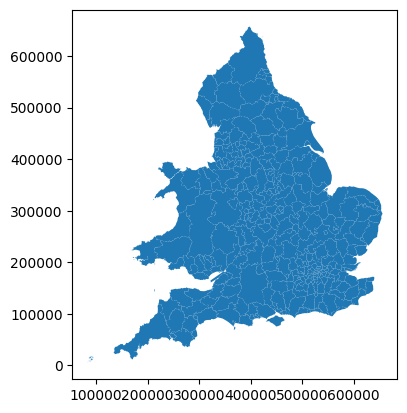

In [245]:
gdf.plot()
plt.show()

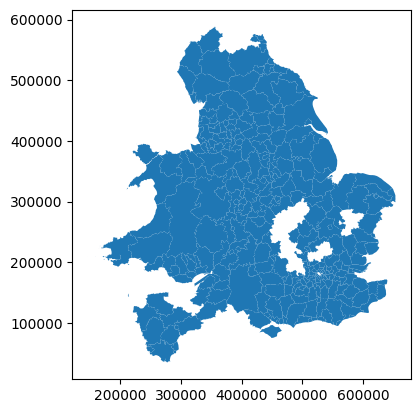

In [246]:
gdf_regression.plot()
plt.show()

In [247]:
gdf_regression['y_lag']

0      30.822857
1      31.666667
2      36.245000
3      32.410000
4      34.711667
         ...    
340    37.745000
341    34.940000
343    28.266667
344    31.136667
345    33.676667
Name: y_lag, Length: 313, dtype: float64

In [248]:
productivity[productivity['geo_code']=="E07000097"]

,geo_code,productivity2022


In [249]:
gdf[gdf['geo_code']=="E06000057"]

,geo_code,geo_label,geo_labelw,label,name,Area,geometry


In [250]:
gdf[gdf['name']=="Northumberland"]

,geo_code,geo_label,geo_labelw,label,name,Area,geometry
123,E06000048,Northumberland,None,E92000001E06000048,Northumberland,5.082426e+09,"MULTIPOLYGON (((431096.128 587293.544, 431095...."


In [251]:
gdf[~gdf['geo_code'].isin(productivity['geo_code'])]

,geo_code,geo_label,geo_labelw,label,name,Area,geometry
17,E07000097,East Hertfordshire,None,E92000001E07000097,East Hertfordshire,4.758460e+08,"POLYGON ((526245.238 218650.998, 526243.752 21..."
50,E08000020,Gateshead,None,E92000001E08000020,Gateshead,1.441805e+08,"POLYGON ((410813.406 562125.812, 410813.440 56..."
51,E41000052,"Cornwall,Isles of Scilly",None,E92000001E41000052,"Cornwall,Isles of Scilly",3.635522e+09,"MULTIPOLYGON (((185900.500 33613.700, 185894.6..."
55,E07000050,North Dorset,None,E92000001E07000050,North Dorset,6.096987e+08,"POLYGON ((375907.092 119992.910, 375913.063 12..."
64,E07000101,Stevenage,None,E92000001E07000101,Stevenage,2.597448e+07,"POLYGON ((522061.594 227005.797, 522143.715 22..."
69,E07000048,Christchurch,None,E92000001E07000048,Christchurch,5.183492e+07,"POLYGON ((413149.309 93839.603, 413151.531 938..."
85,E07000190,Taunton Deane,None,E92000001E07000190,Taunton Deane,4.627927e+08,"POLYGON ((332914.904 127986.500, 332916.687 12..."
90,E07000052,West Dorset,None,E92000001E07000052,West Dorset,1.087853e+09,"POLYGON ((337363.625 100790.297, 337365.293 10..."
117,E07000201,Forest Heath,None,E92000001E07000201,Forest Heath,3.777357e+08,"POLYGON ((566460.000 275112.593, 566433.125 27..."
118,E07000153,Kettering,None,E92000001E07000153,Kettering,2.336382e+08,"POLYGON ((477244.000 282450.190, 477208.924 28..."


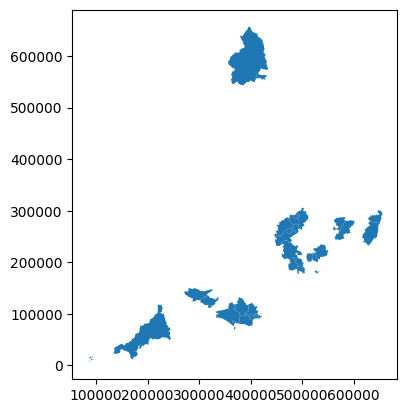

In [252]:
gdf[~gdf['geo_code'].isin(productivity['geo_code'])].plot()
plt.show()

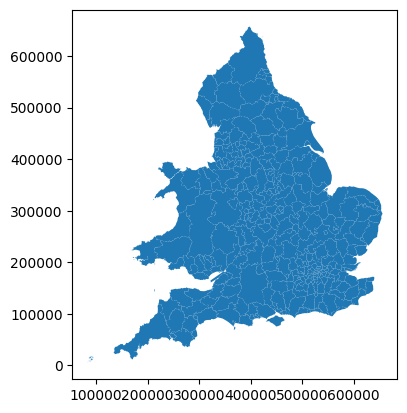

In [253]:
gdf[gdf['geo_code']!="	E07000097"].plot()
plt.show()

In [255]:
# productivity[productivity['Area name'].str.contains("Poole")]

In [256]:
# gdf[gdf['geo_code']=="E08000037"]

In [257]:
# final_df_wo_scot_and_ni[final_df_wo_scot_and_ni['name']=="Poole"]

In [258]:
# productivity

In [259]:
# tmp_df1231123 = gdf[~gdf['geo_code'].isin(productivity['Area code'])]

# # Select rows from productivity where 'name' matches the 'name' in the filtered gdf
# productivity[productivity['Area name'].isin(tmp_df1231123['name'])]

In [260]:
# gdf[~gdf['geo_code'].isin(productivity['Area code'])]

In [261]:
# productivity[productivity["name"].isin(gdf[~gdf['geo_code'].isin(productivity['Area code'])]['name'])]

In [262]:
# tmp_df123 = gdf.merge(productivity, left_on='geo_code',right_on="Area code", suffixes=('_gdf', '_productivity'))
# tmp_df123
# tmp_df123[tmp_df123['name'] != tmp_df123['Area name']]

In [263]:
#To Do
#apply clustered SE
#apply DID

# DID

In [264]:
census_1851

,recid,year,serial,persons,hhwt,geo1_uk1851_1911,countyuk,distuk,subdistuk,headloc,pernum,perwt,momloc,poploc,sploc,relate,related,age,sex,birthyr,nativity,bplcountry,bpluk,labforce,isco68a,disabled,occisco,occhisco,occicem,Conparid
4,30352,1851,6.031000e+06,11,1,826001,1,103,10011,5,4,1,1,5,0,3,3100,12,2,1839,1,42120,7,9,999,2,99,99999,999,1.0
5,15460,1851,3.257000e+06,6,1,826001,1,103,10001,1,6,1,0,0,0,5,5210,19,1,1832,1,42120,3,2,540,2,5,54020,84,1.0
14,31967,1851,6.385000e+06,8,1,826001,1,103,10011,1,6,1,2,1,0,3,3100,8,2,1843,1,42120,7,9,999,2,99,99999,787,1.0
17,23705,1851,4.616000e+06,7,1,826001,1,103,10011,1,1,1,0,0,0,1,1000,75,2,1776,1,42120,7,1,999,2,99,99999,778,1.0
18,25810,1851,5.110000e+06,2,1,826001,1,103,10011,1,2,1,0,0,1,2,2100,39,2,1812,1,42120,14,2,839,2,7,83890,295,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63664167,17631099,1851,3.714066e+09,8,1,826012,60,6202,600001,1,3,1,2,1,0,3,3100,14,1,1837,1,42120,25,9,811,2,7,81120,437,NaN
63664169,17590780,1851,3.705433e+09,7,1,826012,61,6100,610000,1,2,1,0,0,1,2,2100,32,2,1819,1,42120,61,2,621,2,6,62113,175,NaN
63664170,17584903,1851,3.704222e+09,8,1,826012,61,6100,610000,1,5,1,2,1,0,3,3100,18,1,1833,1,42120,61,2,791,2,7,79120,653,NaN
63664174,17666794,1851,3.722202e+09,8,1,826012,62,6201,620000,1,3,1,2,1,0,3,3100,11,2,1840,1,42120,999,9,999,2,99,99999,787,NaN


In [265]:
dat.head()

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
2,ABBEY HOLME,NaN,1851.0,653.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire


In [266]:
dfs = []
for year in range(1851, 1912, 10):  # 1912 is the stop value to include 1911
    filename = f'entrepreneurspast_N_EntsTot_{year}.csv'
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
entrepreneur_counts_yearly_df = pd.concat(dfs, ignore_index=True)

In [267]:
entrepreneur_counts_yearly_df

,Registration district,Country,Year,Total,latitude,longitude
0,ABBEY,BATH,1851,1181.000000,51.383466,-2.364779
1,ABBEY HOLME,NaN,1851,653.000000,54.854321,-3.244028
2,ABBEY HOLME,NaN,1851,653.000000,54.807471,-3.325824
3,ABBOTS BROMLEY,NaN,1851,295.000000,52.824121,-1.871751
4,ABBOTS BROMLEY,NaN,1851,295.000000,52.859441,-1.918171
...,...,...,...,...,...,...
25790,YORK WEST,YORK,1911,1107.728418,53.949693,-1.097674
25791,YORK WEST,YORK,1911,1107.728418,53.956012,-1.079720
25792,YORK WEST,YORK,1911,1107.728418,53.956200,-1.078367
25793,YSPYTTY,NaN,1911,211.787023,53.027532,-3.749240


In [268]:
final_merged_tmp

,Registration district,Country,Year,Total,CONPARID_f_x,Area_x,Conparid,RC1851,RD1851,RSD1851,CONPARID_f_y,Area_y,geo_code,geo_label,geo_labelw,label,name,geo_code_most_frequent
0,ABBEY,BATH,1851.0,1181.0,5593.0,0.875,5593.0,Somerset,Bath,Abbey,5593.0,0.875,E06000022,Bath and North East Somerset,NaN,E92000001E06000022,Bath and North East Somerset,NaN
1,ABBEY HOLME,NaN,1851.0,653.0,11462.0,8.488,11462.0,Cumberland,Wigton,Abbey Holme,11462.0,8.488,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
3,WIGTON,NaN,1851.0,987.0,11458.0,99.466,11458.0,Cumberland,Wigton,Abbey Holme,11458.0,99.466,E07000026,Allerdale,NaN,E92000001E07000026,Allerdale,NaN
4,ABBOTS BROMLEY,NaN,1851.0,295.0,6400.0,38.900,6400.0,Staffordshire,Uttoxeter,Abbots Bromley,6400.0,38.900,E07000193,East Staffordshire,NaN,E92000001E07000193,East Staffordshire,NaN
6,ABBOTS LANGLEY,NaN,1851.0,159.0,1638.0,21.287,1638.0,Hertfordshire,Watford,Abbots Langley,1638.0,21.287,E07000102,Three Rivers,NaN,E92000001E07000102,Three Rivers,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,WORTHING,NaN,1851.0,639.0,862.0,10.117,862.0,Sussex,Worthing,Broadwater,862.0,10.117,E07000223,Adur,NaN,E92000001E07000223,Adur,E07000223
735,WORTLEY,LEEDS,1851.0,955.0,9620.0,4.037,9620.0,"Yorkshire, West Riding",Hunslet,Wortley,9620.0,4.037,E08000035,Leeds,NaN,E92000001E08000035,Leeds,E08000035
742,WYKE,NaN,1851.0,156.0,893.0,4.063,893.0,Sussex,Westhampnett,Wyke,893.0,4.063,E07000225,Chichester,NaN,E92000001E07000225,Chichester,E07000225
746,YARM,NaN,1851.0,0.0,10730.0,4.524,10730.0,Durham,Stockton,Yarm,10730.0,4.524,E06000004,Stockton-on-Tees,NaN,E92000001E06000004,Stockton-on-Tees,E06000004


In [269]:
RD_geocode_convert_table = final_merged_tmp[['Registration district','Country','geo_code']]

In [270]:
(RD_geocode_convert_table[['Registration district','Country']].value_counts() > 1).sum()

17

In [271]:
# Keep only the first occurrence
# Doesn't matter that much bc most of them are in London
RD_geocode_convert_table = RD_geocode_convert_table.drop_duplicates(subset=['Registration district'], keep='first')

In [272]:
entrepreneur_counts_yearly_df = entrepreneur_counts_yearly_df[['Registration district','Country','Year','Total']].drop_duplicates()

In [273]:
len(entrepreneur_counts_yearly_df)

14286

In [274]:
entrepreneur_counts_yearly_df

,Registration district,Country,Year,Total
0,ABBEY,BATH,1851,1181.000000
1,ABBEY HOLME,NaN,1851,653.000000
3,ABBOTS BROMLEY,NaN,1851,295.000000
5,ABBOTS LANGLEY,NaN,1851,159.000000
6,ABBOTSBURY,NaN,1851,125.000000
...,...,...,...,...
25785,YETMINSTER,NaN,1911,295.623116
25788,YORK EAST,YORK,1911,2520.953815
25790,YORK WEST,YORK,1911,1107.728418
25793,YSPYTTY,NaN,1911,211.787023


In [275]:
entrepreneur_counts_yearly_df = entrepreneur_counts_yearly_df.merge(RD_geocode_convert_table,on=["Registration district","Country"],how="left")
entrepreneur_counts_yearly_df = entrepreneur_counts_yearly_df[~entrepreneur_counts_yearly_df['geo_code'].isna()]

In [276]:
entrepreneur_counts_yearly_df.groupby('geo_code').sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000021739C6FF90>>

In [277]:
gdf_regression['CoalDist_x'].min()

0.0109314438982968

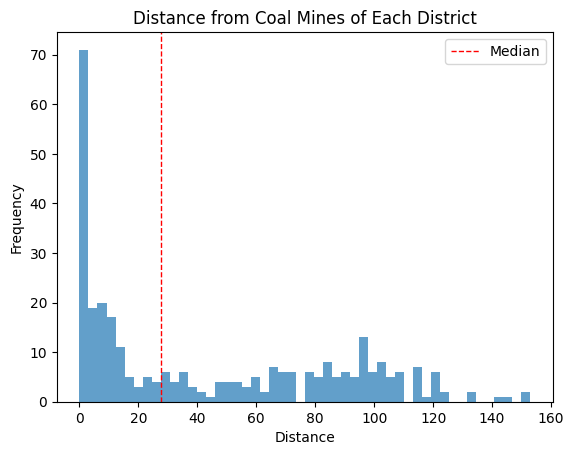

In [278]:
plt.hist(gdf_regression['CoalDist_x'], bins=50, alpha=0.7)
plt.axvline(gdf_regression['CoalDist_x'].median(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance from Coal Mines of Each District')
plt.legend(['Median'])
plt.show()

In [279]:
gdf_tmp.dropna(subset=['activeBusiness2022'])['CoalDist_x']<1

0      False
1       True
2      False
3       True
4      False
       ...  
340    False
341    False
343    False
344    False
345    False
Name: CoalDist_x, Length: 313, dtype: bool

In [280]:
filtered_gdf = gdf_tmp.dropna(subset=['activeBusiness2022'])

In [281]:
filtered_gdf['coal_reliant'] = (filtered_gdf['CoalDist_x'] < 1).astype(int)

C:\Users\binso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [282]:
from sklearn.linear_model import LogisticRegression
from causalml.match import NearestNeighborMatch
outcome_var = 'activeBusiness2022'  # This would be your outcome variable
treatment_var = 'coal_reliant'
covariates = ['primary_ratio','Major_YN','population','momloc_0_ratio','poploc_0_ratio']  # List other covariates

filtered_gdf = filtered_gdf.dropna(subset=covariates)
filtered_gdf = filtered_gdf.dropna(subset=outcome_var)
# Fit a logistic regression model to estimate propensity scores
logit = LogisticRegression()
filtered_gdf['propensity_score'] = logit.fit(filtered_gdf[covariates], filtered_gdf[treatment_var]).predict_proba(filtered_gdf[covariates])[:, 1]

# Matching using Nearest Neighbor Matching from causalml
nnm = NearestNeighborMatch(replace=False, ratio=1, random_state=42)
matched_data = nnm.match(data=filtered_gdf, treatment_col=treatment_var, score_cols=['propensity_score'])

# Continue with your analysis using `matched_data`
print(matched_data.head())

      geo_code            geo_label geo_labelw               label  \
291  E08000013           St. Helens       None  E92000001E08000013   
185  E08000021  Newcastle upon Tyne       None  E92000001E08000021   
197  E07000036              Erewash       None  E92000001E07000036   
333  E07000192        Cannock Chase       None  E92000001E07000192   
251  W06000018           Caerphilly  Caerffili  W92000004W06000018   

                  name_x          Area  \
291           St. Helens  1.364824e+08   
185  Newcastle upon Tyne  1.151942e+08   
197              Erewash  1.097116e+08   
333        Cannock Chase  7.894386e+07   
251           Caerphilly  2.776246e+08   

                                              geometry        Area_x  \
291  POLYGON ((346690.091 397018.344, 346688.917 39...  1.364824e+08   
185  POLYGON ((414460.697 566236.846, 414461.572 56...  1.151942e+08   
197  POLYGON ((440746.033 342754.507, 440747.173 34...  1.097116e+08   
333  POLYGON ((402523.977 318732.337, 

In [283]:
len(matched_data)

90

In [284]:
matched_data.groupby('propensity_score')['propensity_score'].value_counts()

propensity_score
0.010038    1
0.016151    1
0.026312    1
0.027507    1
0.028930    1
           ..
0.441621    1
0.453303    1
0.453378    1
0.460537    1
0.460811    1
Name: count, Length: 90, dtype: int64

In [285]:
from scipy.stats import ttest_ind
def standardized_mean_difference(data, variable, group_var):
    treatment_mean = data[data[group_var] == 1][variable].mean()
    control_mean = data[data[group_var] == 0][variable].mean()
    pooled_std = np.sqrt((data[data[group_var] == 1][variable].std()**2 + data[data[group_var] == 0][variable].std()**2) / 2)
    smd = (treatment_mean - control_mean) / pooled_std
    return smd


for var in ['primary_ratio','Major_YN','population','momloc_0_ratio','poploc_0_ratio'] :
    print(var, standardized_mean_difference(matched_data, var, 'coal_reliant'))
    
    
t_stat, p_value = ttest_ind(matched_data[matched_data['coal_reliant'] == 1]['activeBusiness2022'],
                            matched_data[matched_data['coal_reliant'] == 0]['activeBusiness2022'],
                            equal_var=False)
print("\n\nT-test Results: t =", t_stat, ", p =", p_value)


primary_ratio -0.17816803332777825
Major_YN 0.08800440033002739
population -0.01793228420218289
momloc_0_ratio -1.5448199173881512
poploc_0_ratio -1.3044050924934294


T-test Results: t = -2.130717787315131 , p = 0.03620039772339701


In [286]:
matched_data[['geo_code','coal_reliant']]

,geo_code,coal_reliant
291,E08000013,1
185,E08000021,1
197,E07000036,1
333,E07000192,1
251,W06000018,1
...,...,...
58,E09000011,0
9,E06000018,0
275,E07000164,0
289,E07000171,0


In [287]:
entrepreneur_counts_yearly_df = entrepreneur_counts_yearly_df.merge(matched_data[['geo_code','coal_reliant']], on="geo_code",how="inner")

In [288]:
entrepreneur_counts_yearly_df

,Registration district,Country,Year,Total,geo_code,coal_reliant
0,ABBEY,BATH,1851,1181.000000,E06000022,1
1,BATHEASTON,BATH,1851,28.000000,E06000022,1
2,BATHWICK,BATH,1851,473.000000,E06000022,1
3,BITTON,NaN,1851,330.000000,E06000022,1
4,CHEW MAGNA,NaN,1851,349.000000,E06000022,1
...,...,...,...,...,...,...
3352,STOCKTON,STOCKTON-ON-TEES,1861,1290.124974,E06000004,0
3353,STOCKTON,STOCKTON-ON-TEES,1871,NaN,E06000004,0
3354,STOCKTON,STOCKTON-ON-TEES,1881,2276.000000,E06000004,0
3355,STOCKTON,STOCKTON-ON-TEES,1891,2642.057567,E06000004,0


In [289]:
entrepreneur_counts_yearly_df.dtypes

Registration district     object
Country                   object
Year                       int64
Total                    float64
geo_code                  object
coal_reliant               int32
dtype: object

In [290]:
grouped_data = entrepreneur_counts_yearly_df.dropna(subset=['Total']).select_dtypes(include=[np.number]).groupby(['Year', 'coal_reliant']).mean().unstack('coal_reliant')
grouped_data 

Total             
coal_reliant           0            1
Year                                 
1851          522.244382   524.403846
1861          524.652789   596.148511
1881          665.984277   805.631313
1891          679.535103   917.912352
1901          689.905383  1043.716011
1911          572.457195   965.936280

In [291]:
total_columns = grouped_data.loc[:, grouped_data.columns.get_level_values(0) == 'Total']
total_columns

Total             
coal_reliant           0            1
Year                                 
1851          522.244382   524.403846
1861          524.652789   596.148511
1881          665.984277   805.631313
1891          679.535103   917.912352
1901          689.905383  1043.716011
1911          572.457195   965.936280

<Figure size 1000x600 with 0 Axes>

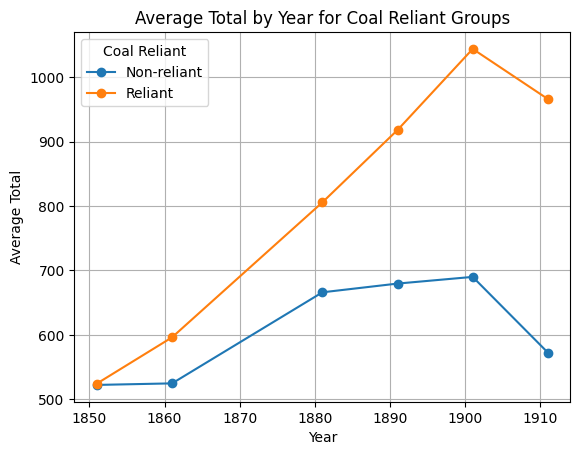

In [292]:
plt.figure(figsize=(10, 6))  # Adjust the size of the figure as needed
total_columns.plot(kind='line', marker='o')  # 'o' adds markers to each data point on the line
plt.title('Average Total by Year for Coal Reliant Groups')
plt.xlabel('Year')
plt.ylabel('Average Total')
plt.grid(True)  # Adds a grid for easier readability
plt.legend(title='Coal Reliant', labels=['Non-reliant', 'Reliant'])
plt.show()

In [293]:
model = smf.ols('Total ~ C(Year) * C(coal_reliant)', data=entrepreneur_counts_yearly_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     12.26
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           7.09e-23
Time:                        00:08:41   Log-Likelihood:                -22561.
No. Observations:                2833   AIC:                         4.515e+04
Df Residuals:                    2821   BIC:                         4.522e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [294]:
active_business_yealy = pd.read_csv("active_business_yealy.csv")

In [295]:
active_business_yealy.rename(columns={'Area code':'geo_code'},inplace=True)

In [296]:
active_business_yealy

,geo_code,Area name,2017,2018,2019,2020,2021,2022
0,E06000001,Hartlepool,2660.0,2570.0,2535.0,2480.0,2485.0,2430.0
1,E06000002,Middlesbrough,3625.0,3690.0,3865.0,3940.0,4035.0,4040.0
2,E06000003,Redcar and Cleveland,3400.0,3415.0,3425.0,3335.0,3345.0,3420.0
3,E06000004,Stockton-on-Tees,6145.0,6075.0,6085.0,6070.0,6210.0,6170.0
4,E06000005,Darlington,3420.0,3715.0,3525.0,3410.0,3665.0,3700.0
...,...,...,...,...,...,...,...,...
396,W06000020,Torfaen,2265.0,2295.0,2370.0,2370.0,2415.0,2455.0
397,W06000021,Monmouthshire,4120.0,4105.0,4155.0,4110.0,4225.0,4240.0
398,W06000022,Newport,5485.0,5620.0,5650.0,5325.0,5200.0,4885.0
399,W06000023,Powys,5780.0,5685.0,5695.0,5665.0,5785.0,5795.0


In [297]:
matched_active_business_yealy = active_business_yealy.merge(matched_data[['geo_code','coal_reliant']], on="geo_code",how="inner")

In [298]:
matched_active_business_yealy.columns

Index(['geo_code', 'Area name', '2017', '2018', '2019', '2020', '2021', '2022',
       'coal_reliant'],
      dtype='object')

In [299]:
columns_to_convert = ['2017', '2018', '2019', '2020', '2021', '2022']
for column in columns_to_convert:
    matched_active_business_yealy[column] = pd.to_numeric(matched_active_business_yealy[column], errors='coerce')

# Now proceed to melt the DataFrame
melted_df = matched_active_business_yealy.melt(id_vars=['geo_code', 'Area name', 'coal_reliant'], 
                                               value_vars=columns_to_convert, 
                                               var_name='Year', 
                                               value_name='Total')
melted_df

,geo_code,Area name,coal_reliant,Year,Total
0,E06000004,Stockton-on-Tees,0,2017,6145.0
1,E06000008,Blackburn with Darwen,1,2017,5455.0
2,E06000012,North East Lincolnshire,0,2017,5245.0
3,E06000018,Nottingham,0,2017,9995.0
4,E06000019,Herefordshire,0,2017,8340.0
...,...,...,...,...,...
535,W06000018,Caerphilly,1,2022,4595.0
536,W06000019,Blaenau Gwent,1,2022,1485.0
537,W06000020,Torfaen,1,2022,2455.0
538,W06000023,Powys,0,2022,5795.0


In [300]:
grouped_data = melted_df.groupby(['Year', 'coal_reliant'])['Total'].mean().unstack()

In [301]:
grouped_data

coal_reliant,0,1
Year,,
2017,8605.888889,6230.777778
2018,8647.555556,6250.777778
2019,8835.555556,6327.777778
2020,8901.444444,6392.222222
2021,8952.666667,6630.777778
2022,8877.111111,6635.666667


<Figure size 1000x600 with 0 Axes>

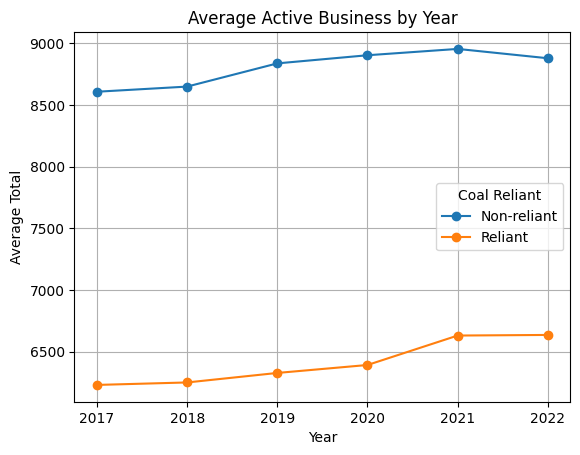

In [302]:
plt.figure(figsize=(10, 6))  # Adjust the size of the figure as needed
grouped_data.plot(kind='line', marker='o')  # 'o' adds markers to each data point on the line
plt.title('Average Active Business by Year')
plt.xlabel('Year')
plt.ylabel('Average Total')
plt.grid(True)  # Adds a grid for easier readability
plt.legend(title='Coal Reliant', labels=['Non-reliant', 'Reliant'])
plt.show()

In [303]:
grouped_data.columns

Index([0, 1], dtype='int32', name='coal_reliant')

In [304]:
model = smf.ols('Total ~ C(Year) * C(coal_reliant)', data=melted_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.116
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           0.000438
Time:                        00:08:57   Log-Likelihood:                -5335.6
No. Observations:                 540   AIC:                         1.070e+04
Df Residuals:                     528   BIC:                         1.075e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [305]:
entrepreneur_counts_yearly_df

,Registration district,Country,Year,Total,geo_code,coal_reliant
0,ABBEY,BATH,1851,1181.000000,E06000022,1
1,BATHEASTON,BATH,1851,28.000000,E06000022,1
2,BATHWICK,BATH,1851,473.000000,E06000022,1
3,BITTON,NaN,1851,330.000000,E06000022,1
4,CHEW MAGNA,NaN,1851,349.000000,E06000022,1
...,...,...,...,...,...,...
3352,STOCKTON,STOCKTON-ON-TEES,1861,1290.124974,E06000004,0
3353,STOCKTON,STOCKTON-ON-TEES,1871,NaN,E06000004,0
3354,STOCKTON,STOCKTON-ON-TEES,1881,2276.000000,E06000004,0
3355,STOCKTON,STOCKTON-ON-TEES,1891,2642.057567,E06000004,0


In [306]:
melted_df

,geo_code,Area name,coal_reliant,Year,Total
0,E06000004,Stockton-on-Tees,0,2017,6145.0
1,E06000008,Blackburn with Darwen,1,2017,5455.0
2,E06000012,North East Lincolnshire,0,2017,5245.0
3,E06000018,Nottingham,0,2017,9995.0
4,E06000019,Herefordshire,0,2017,8340.0
...,...,...,...,...,...
535,W06000018,Caerphilly,1,2022,4595.0
536,W06000019,Blaenau Gwent,1,2022,1485.0
537,W06000020,Torfaen,1,2022,2455.0
538,W06000023,Powys,0,2022,5795.0


In [310]:
print(melted_df[['geo_code', 'Year', 'coal_reliant', 'Total']].dtypes)
print(entrepreneur_counts_yearly_df[['geo_code', 'Year', 'coal_reliant', 'Total']].dtypes)


geo_code         object
Year             object
coal_reliant      int32
Total           float64
dtype: object
geo_code         object
Year              int64
coal_reliant      int32
Total           float64
dtype: object


In [311]:
business_entrepreneur_merged_df = pd.concat([
    melted_df[['geo_code', 'Year', 'coal_reliant', 'Total']],
    entrepreneur_counts_yearly_df[['geo_code', 'Year', 'coal_reliant', 'Total']]
], ignore_index=True)

In [312]:
business_entrepreneur_merged_df

,geo_code,Year,coal_reliant,Total
0,E06000004,2017,0,6145.000000
1,E06000008,2017,1,5455.000000
2,E06000012,2017,0,5245.000000
3,E06000018,2017,0,9995.000000
4,E06000019,2017,0,8340.000000
...,...,...,...,...
3892,E06000004,1861,0,1290.124974
3893,E06000004,1871,0,NaN
3894,E06000004,1881,0,2276.000000
3895,E06000004,1891,0,2642.057567


In [315]:
business_entrepreneur_merged_df['Year'] = business_entrepreneur_merged_df['Year'].astype(int)

In [319]:
# Check for missing values in the DataFrame
print(business_entrepreneur_merged_df[['post_treatment', 'coal_reliant', 'treatment_interaction', 'Total']].isnull().sum())


post_treatment             0
coal_reliant               0
treatment_interaction      0
Total                    524
dtype: int64


In [320]:
business_entrepreneur_merged_df.dropna(inplace=True)

In [321]:
# Assuming 'df' is your DataFrame with the necessary data
business_entrepreneur_merged_df['post_treatment'] = business_entrepreneur_merged_df['Year'].apply(lambda x: 1 if x > 1980 else 0)
business_entrepreneur_merged_df['treatment_interaction'] = business_entrepreneur_merged_df['post_treatment'] * business_entrepreneur_merged_df['coal_reliant']

X = business_entrepreneur_merged_df[['post_treatment', 'coal_reliant', 'treatment_interaction']]
X = sm.add_constant(X)  # Adds a constant term
y = business_entrepreneur_merged_df['Total']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:22:23   Log-Likelihood:                -30427.
No. Observations:                3373   AIC:                         6.086e+04
Df Residuals:                    3369   BIC:                         6.089e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   604.40

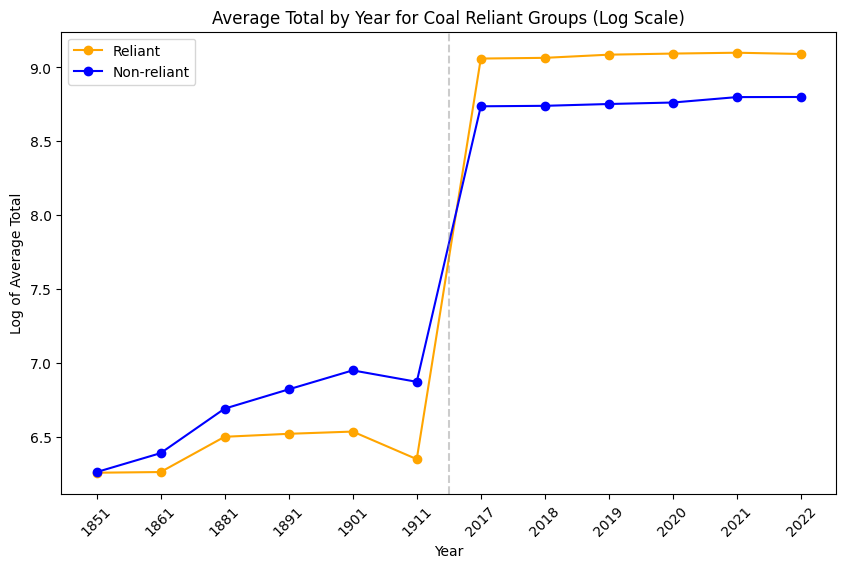

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for the two periods
data_early = {
    'Year': [1851, 1861, 1881, 1891, 1901, 1911],
    'Reliant': [522.24, 524.65, 665.98, 679.54, 689.91, 572.46],
    'Non-reliant': [524.40, 596.15, 805.63, 917.91, 1043.72, 965.94]
}

data_late = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],
    'Reliant': [8605.89, 8647.56, 8835.56, 8901.44, 8952.67, 8877.11],
    'Non-reliant': [6230.78, 6250.78, 6327.78, 6392.22, 6630.78, 6635.67]
}

# Create DataFrames
df_early = pd.DataFrame(data_early)
df_late = pd.DataFrame(data_late)

# Combine the dataframes and treat the years as consecutive
df_early['Index'] = range(len(df_early))
df_late['Index'] = range(len(df_early), len(df_early) + len(df_late))

# Concatenate the data
df_combined = pd.concat([df_early, df_late])

# Convert values to logarithmic scale
df_combined['Reliant_log'] = np.log(df_combined['Reliant'])
df_combined['Non-reliant_log'] = np.log(df_combined['Non-reliant'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(df_combined['Index'], df_combined['Reliant_log'], label='Reliant', marker='o', color='orange')
ax.plot(df_combined['Index'], df_combined['Non-reliant_log'], label='Non-reliant', marker='o', color='blue')

# Add vertical dashed line with 40% transparency
mid_index = len(df_early) - 0.5
ax.axvline(x=mid_index, color='gray', linestyle='--', alpha=0.4)

# Adjust x-ticks to show actual years
x_ticks = list(df_combined['Index'])
x_labels = list(df_early['Year']) + list(df_late['Year'])
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Log of Average Total')
ax.set_title('Average Total by Year for Coal Reliant Groups (Log Scale)')
ax.legend()

plt.show()


# clustered SE